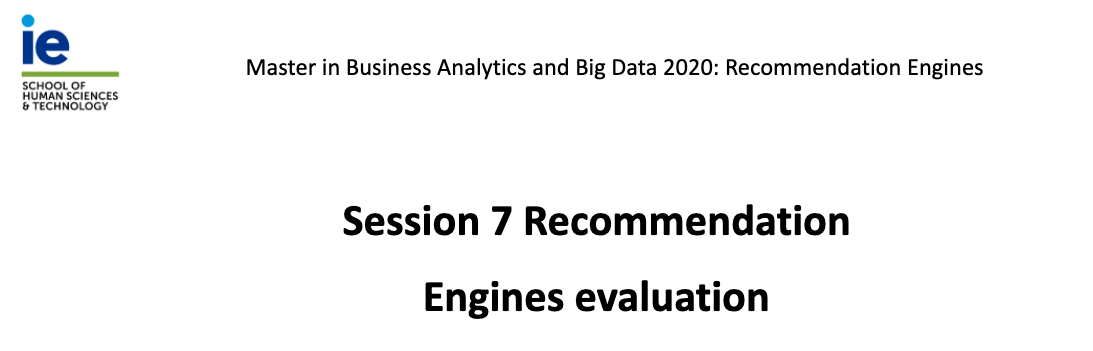

# Introduction

Please make sure that you are connected to a hosted Google Colab environment. If that's the case, at the upper right part of your screen you should see a green check mark like this one 

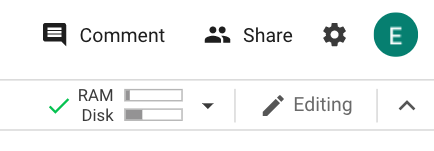

If you are not connected, please click on Connect button 

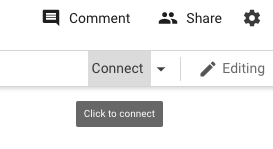

**Before continue, please expand all notebook sections, View->Expand sections**

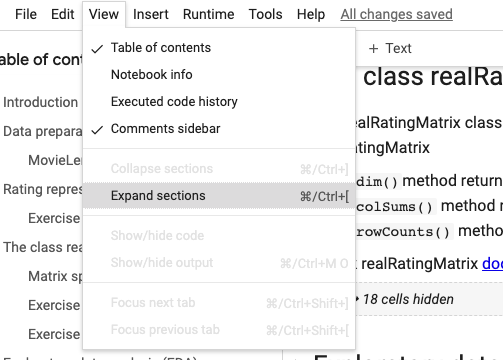



After that please, execute cells below to install required libraries, it will take a couple of minutes. 

## Environment setup

In [1]:
install.packages(c('dplyr','ggplot2','knitr','recommenderlab'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppProgress’, ‘arules’, ‘proxy’, ‘registry’, ‘irlba’, ‘recosystem’




In [2]:
library(dplyr)
library(ggplot2)
library(knitr)
library(recommenderlab)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix

Loading required package: arules


Attaching package: ‘arules’


The following object is masked from ‘package:dplyr’:

    recode


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: proxy


Attaching package: ‘proxy’


The following object is masked from ‘package:Matrix’:

    as.matrix


The following objects are masked from ‘package:stats’:

    as.dist, dist


The following object is masked from ‘package:base’:

    as.matrix


Loading required package: registry

Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



#Splitting the dataset

To evaluate models, we need to build them with some data and test them on some
other data. The recommenderlab package contains prebuilt tools that help us in this task.

The target is to define two datasets, which are as follows:
- **Training set:** This set includes users from which the model learns
- **Test set:** This set includes users to whom we recommend movies

As we saw in session 6 in order to measure model's perfomance is important to have clear if we are using either a **classification (like/dislike) or regression(ratings) approach. Because performance metrics are dependant on the  approach choosen.** 


## Simple split

The easiest way to build a training and test set is to split the data in two parts. First, we need to decide how many users to put into each part. For instance, we can put 80 percent of the users into the training set. We can define percentage_training by specifying the percentage of the training set:

In [5]:
data(MovieLense)
ratings_movies <- MovieLense[rowCounts(MovieLense) > 50,
colCounts(MovieLense) > 100]
ratings_movies

560 x 332 rating matrix of class ‘realRatingMatrix’ with 55298 ratings.

In [6]:
percentage_training <- 0.8

For each user in the test set, we need to define how many items to use to generate recommendations. The remaining items will be used to test the model accuracy. It's better that this parameter is lower than the minimum number of items purchased by
any user so that we don't have users without items to test the models:

In [7]:
min(rowCounts(ratings_movies))

[1] 18

In [8]:
items_to_keep <- 15

Evaluating a model consists of comparing the recommendations with the unknown ratings. The ratings are between 1 and 5, and we need to define what constitutes good and bad items. For this purpose, we will define a threshold with the minimum
rating that is considered good:

In [9]:
rating_threshold <- 3

With this parameters `percentage_training`, `items_to_keep` and `rating_threshol` we are ready to split the data. The recommenderlab package provdes a function `evaluationScheme` to test different evaluation schemas. The parameters are defined as follows:

- data: This is the initial dataset
- method: This is the way to split the data. In this case, it's split
- train: This is the percentage of data in the training set
- given: This is the number of items to keep
- goodRating: This is the rating threshold
- k: This is the number of times to run the evaluation, used for k-fold cross validation schemas. 

In [10]:
eval_sets <- evaluationScheme(data = ratings_movies, method = "split",
train = percentage_training, given = items_to_keep, goodRating =
rating_threshold, k = 1)
## Evaluation scheme with 15 items given
## Method: 'split' with 1 run(s).
## Training set proportion: 0.800

## Good ratings: >=3.000000
## Data set: 560 x 332 rating matrix of class 'realRatingMatrix' with 55298 ratings.

In [11]:
eval_sets

Evaluation scheme with 15 items given
Method: ‘split’ with 1 run(s).
Training set proportion: 0.800
Good ratings: >=3.000000
Data set: 560 x 332 rating matrix of class ‘realRatingMatrix’ with 55298 ratings.

In order to extract the sets, we need to use **`getData`**. There are three sets:
- train: This is the training set
- known: This is the test set, with the item used to build the recommendations
- unknown: This is the test set, with the item used to test the recommendations

Let's take a look at the training set:

In [12]:
getData(eval_sets,"train")

448 x 332 rating matrix of class ‘realRatingMatrix’ with 45018 ratings.

In [13]:
getData(eval_sets,"known")

112 x 332 rating matrix of class ‘realRatingMatrix’ with 1680 ratings.

In [14]:
options(repr.plot.width=15, repr.plot.height=8)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



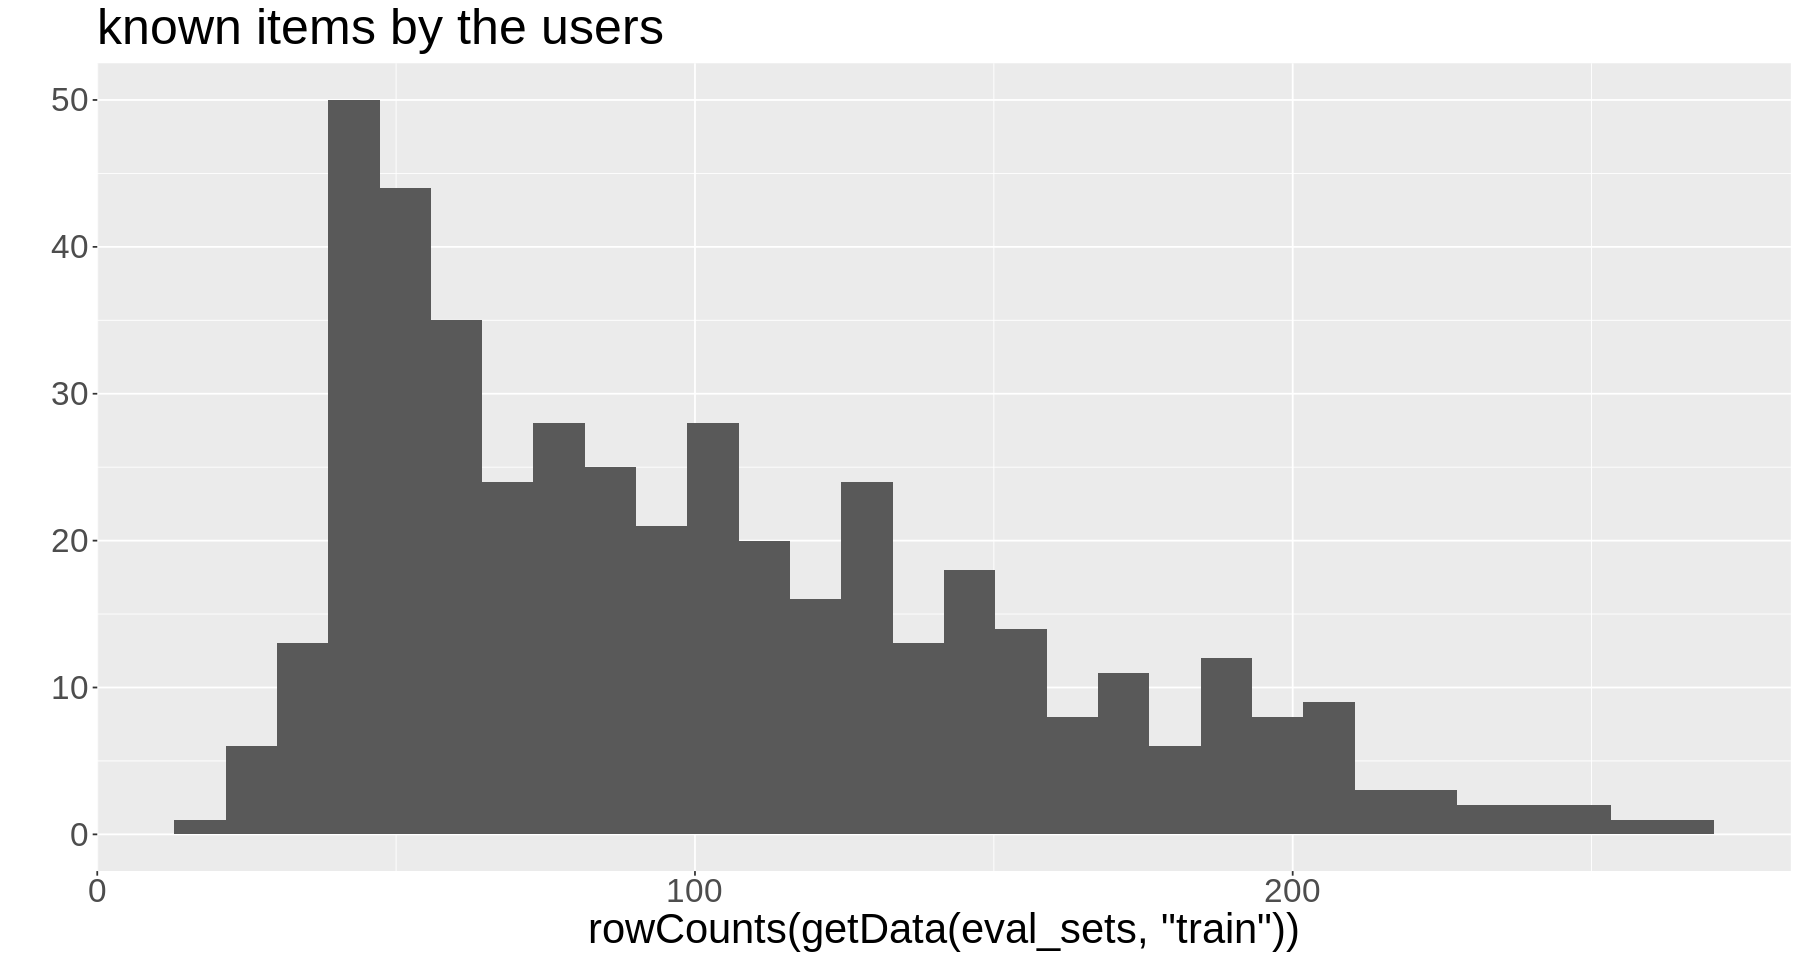

In [15]:
qplot(rowCounts(getData(eval_sets, "train"))) + 
geom_histogram(binwidth = 1) + ggtitle("known items by the users") + theme(text = element_text(size = 25))  


### Exercise 1 (1 point)
Please draw a similar graph with the number of ratings per user using the unkown dataset. 

**Answer:**

112 x 332 rating matrix of class ‘realRatingMatrix’ with 8600 ratings.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



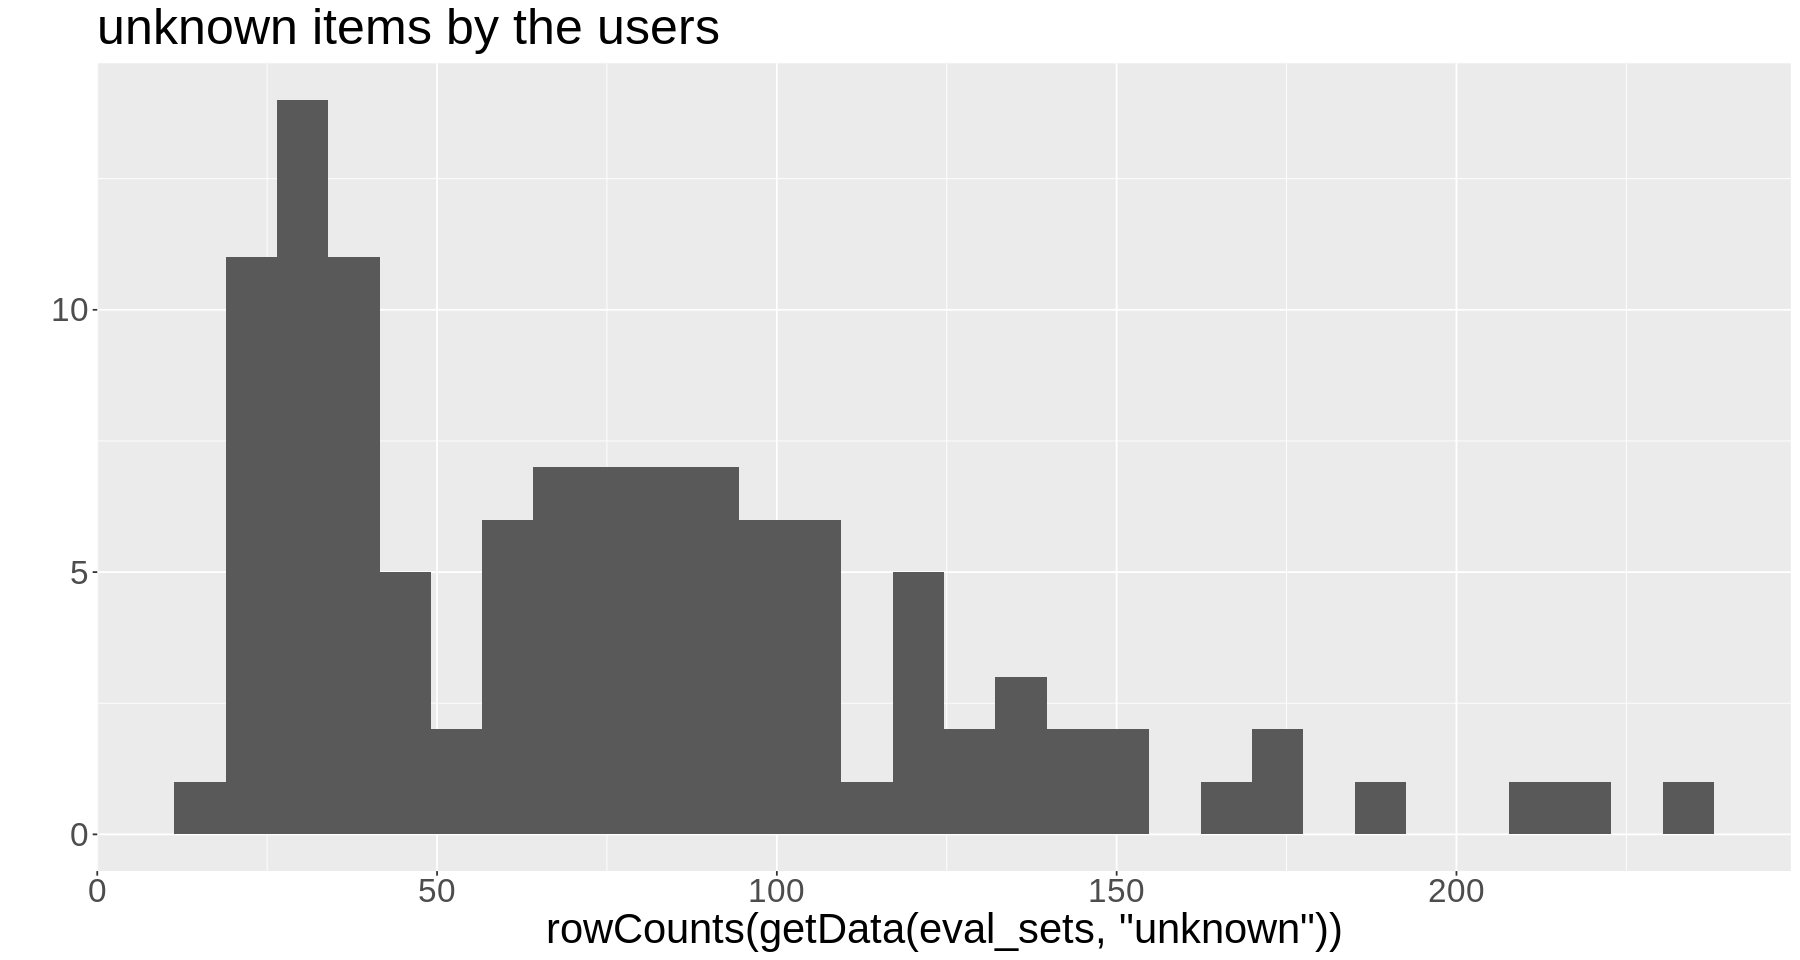

In [17]:
## INSERT YOUR CODE HERE
getData(eval_sets,"unknown")
options(repr.plot.width=15, repr.plot.height=8)
qplot(rowCounts(getData(eval_sets, "unknown"))) + 
geom_histogram(binwidth = 1) + ggtitle("unknown items by the users") + theme(text = element_text(size = 25))  

Below we plot the distribution of ratings in the train dataset. As it's shown clearly at the histogran the distribution of ratings in not an uniform distribution. 

In [18]:
ratings<- as.vector(getData(eval_sets, "train")@data)
ratings <- ratings[ratings!=0]

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



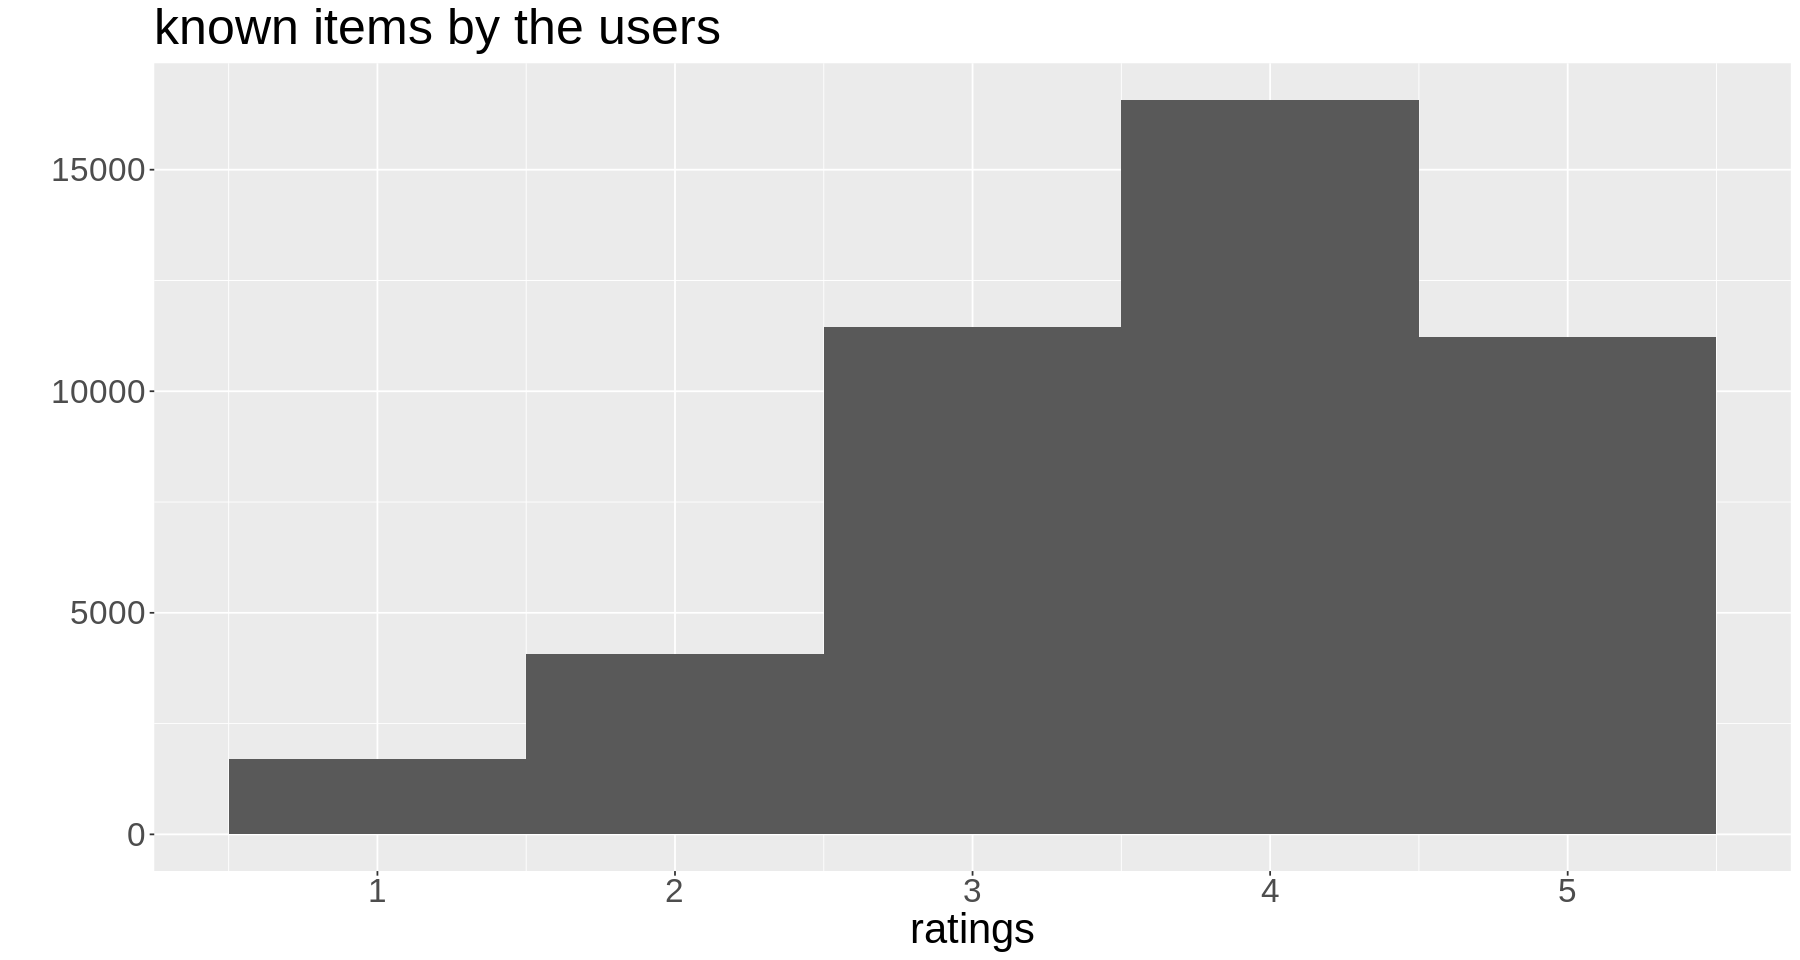

In [19]:
qplot(ratings) + 
geom_histogram(binwidth = 1) + ggtitle("known items by the users") + theme(text = element_text(size = 25))  

### Exercise 2 (1 point) 

Repeat the previous rating histogram but instead of using "train" data use unkown. 

```
ratings<- as.vector(getData(eval_sets, "train")@data)
ratings <- ratings[ratings!=0]

qplot(ratings) + 
geom_histogram(binwidth = 1) + ggtitle("known items by the users") + theme(text = element_text(size = 25))  
```


**Answer:**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



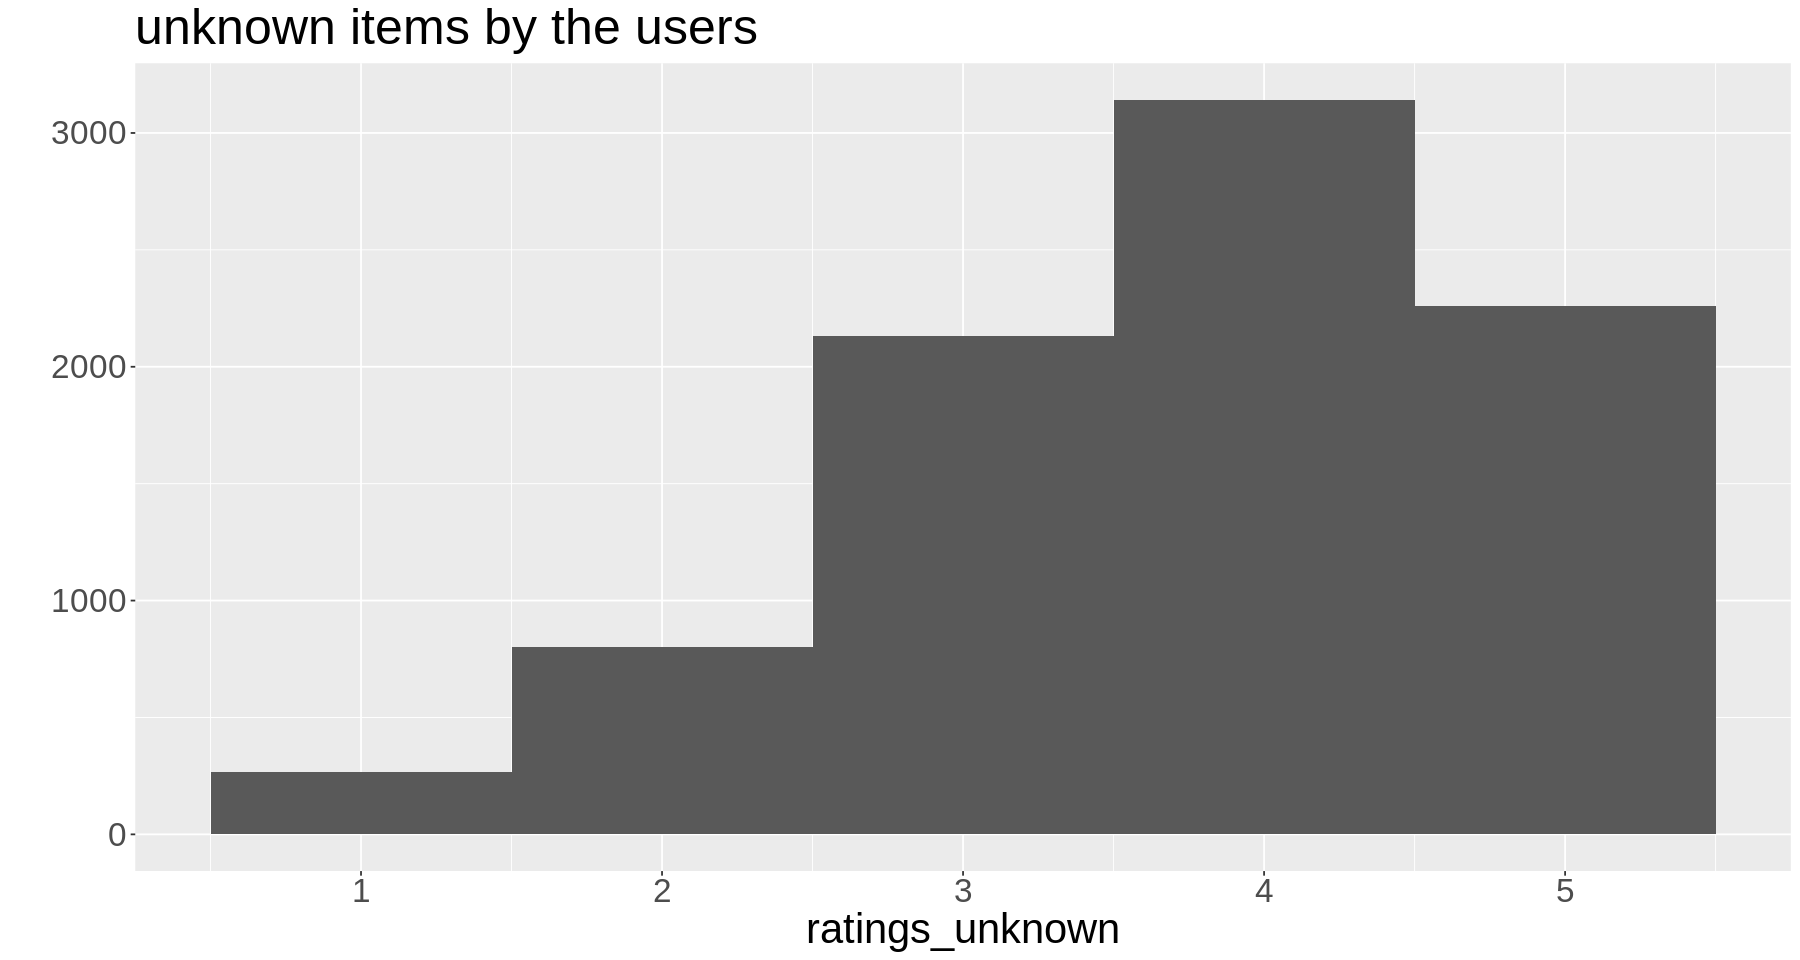

In [20]:
## INSERT YOUR CODE HERE
ratings_unknown<- as.vector(getData(eval_sets, "unknown")@data)
ratings_unknown <- ratings_unknown[ratings_unknown!=0]
 
qplot(ratings_unknown) + 
geom_histogram(binwidth = 1) + ggtitle("unknown items by the users") + theme(text = element_text(size = 25))  

### Exercise 3 (1 point)

How would you check if both dataset training and unkown have a similar distribution

**Answer:**


	Shapiro-Wilk normality test

data:  ratings_train[1:5000]
W = 0.86511, p-value < 2.2e-16



	Shapiro-Wilk normality test

data:  ratings_unknown[1:5000]
W = 0.87169, p-value < 2.2e-16


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.735   5.000   5.000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   3.000   4.000   3.701   4.000   5.000 

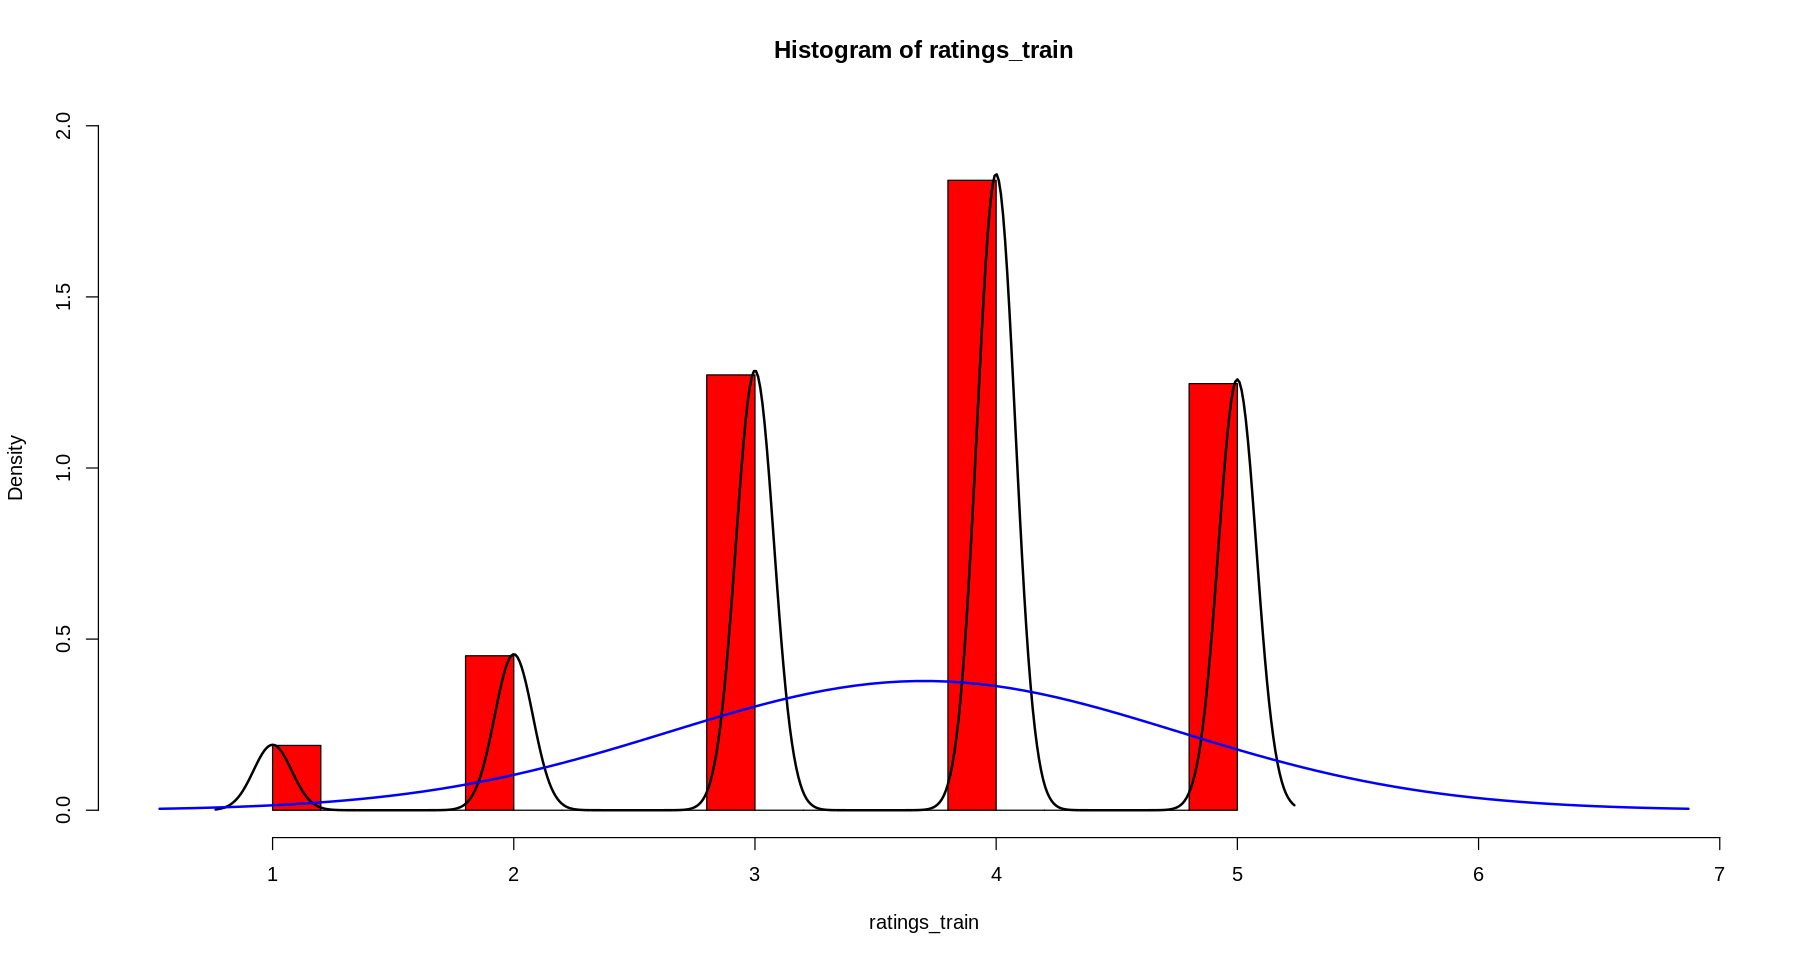

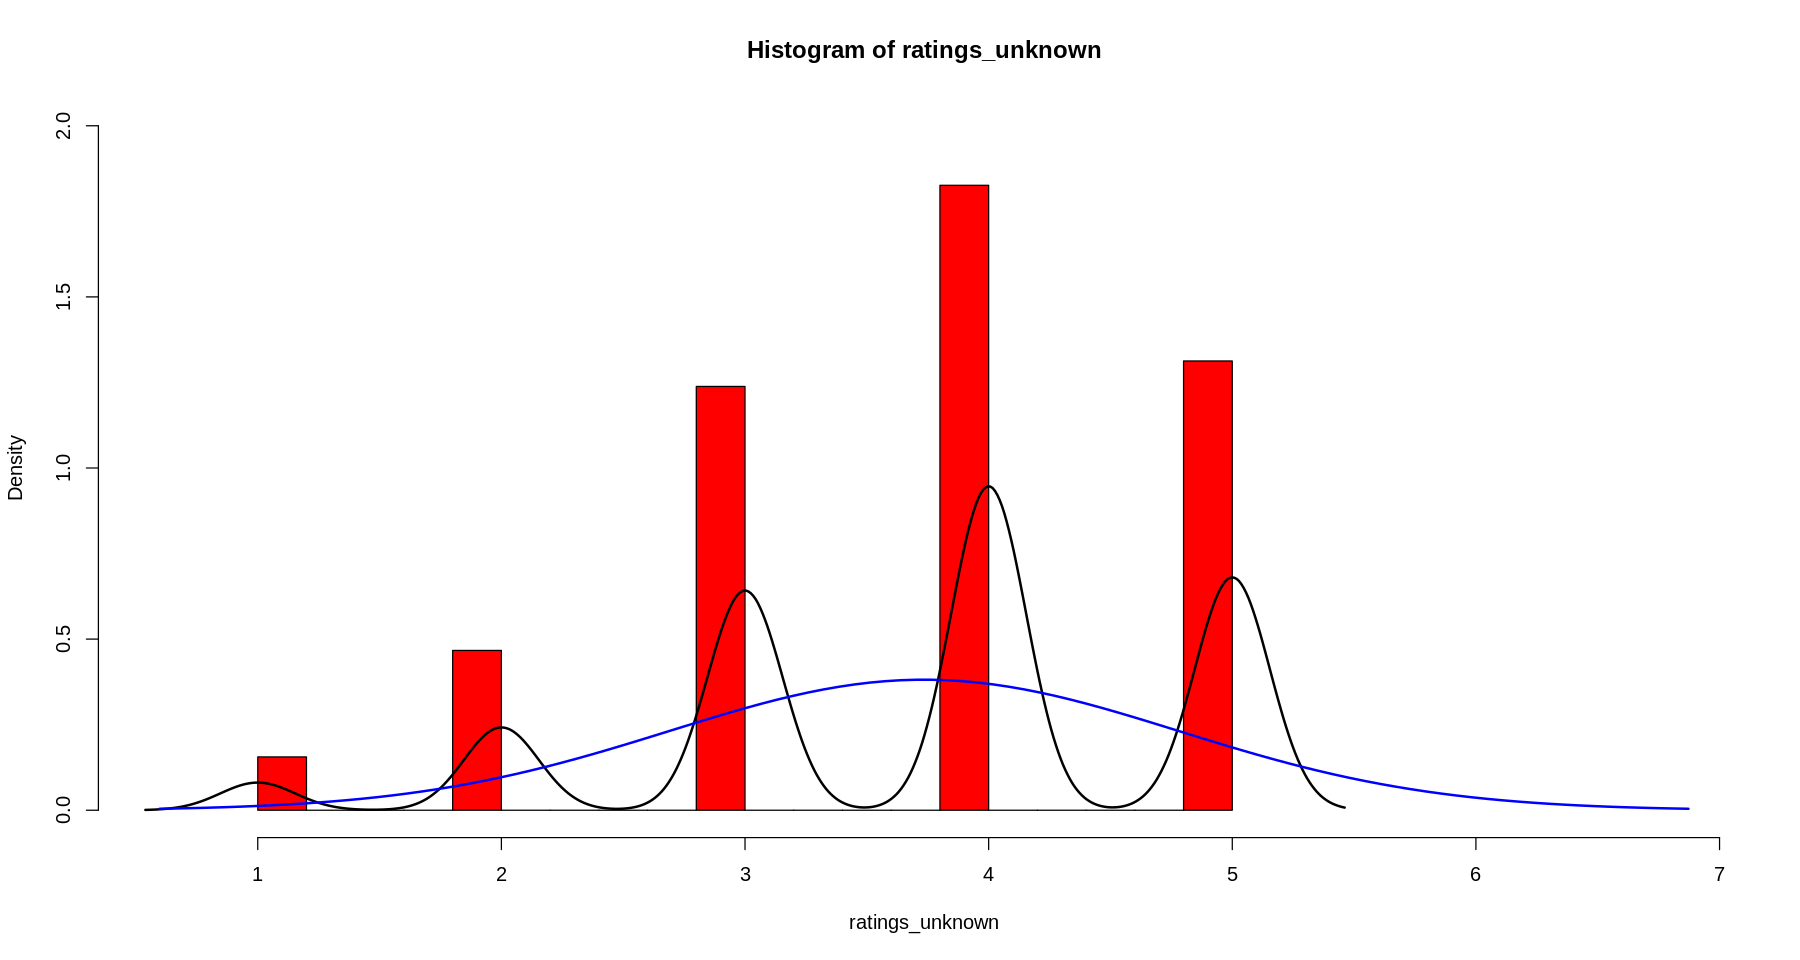

In [21]:
## INSERT AND IMPLEMENT YOUR CODE HERE
#install.packages("caret")
#library (caret) 
## Establishing both vectors that allowed us to see the ratings distribution
ratings_train<- as.vector(getData(eval_sets, "train")@data)
ratings_train <- ratings_train[ratings_train!=0]
ratings_unknown<- as.vector(getData(eval_sets, "unknown")@data)
ratings_unknown <- ratings_unknown[ratings_unknown!=0]
## Using the Shapiro test to check for normality in both distributions
shapiro.test(ratings_train[1:5000])
shapiro.test(ratings_unknown[1:5000])
## Checking how values are distributed with quartiles
summary(ratings_unknown)
summary(ratings_train)
## Checking graphically how they are distributed
hist(ratings_train,prob=T,ylim=c(0,2),xlim=c(mean(ratings_train)-3*sd(ratings_train),mean(ratings_train)+3*sd(ratings_train)),col="red")
lines(density(ratings_train),lwd=2)
mu<-mean(ratings_train)
sigma<-sd(ratings_train)
x<-seq(mu-3*sigma,mu+3*sigma,length=100)
yy<-dnorm(x,mu,sigma)
lines(x,yy,lwd=2,col="blue")

hist(ratings_unknown,prob=T,ylim=c(0,2),xlim=c(mean(ratings_unknown)-3*sd(ratings_unknown),mean(ratings_unknown)+3*sd(ratings_unknown)),col="red")
lines(density(ratings_unknown),lwd=2)
mu<-mean(ratings_unknown)
sigma<-sd(ratings_unknown)
x<-seq(mu-3*sigma,mu+3*sigma,length=100)
yy<-dnorm(x,mu,sigma)
lines(x,yy,lwd=2,col="blue")

## K-fold validation 


The previous approach tested the recommender on part of the users. If, instead, we test the recommendation on each user, we could measure the
performances much more accurately. We can split the data into some chunks, take a chunk out as the test set, and evaluate the accuracy. Then, we can do the same with each other chunk and compute the average accuracy. This approach is called k-fold
and it's supported by recommenderlab.

An example a k-fold validation wiht K=5 is provided below. 
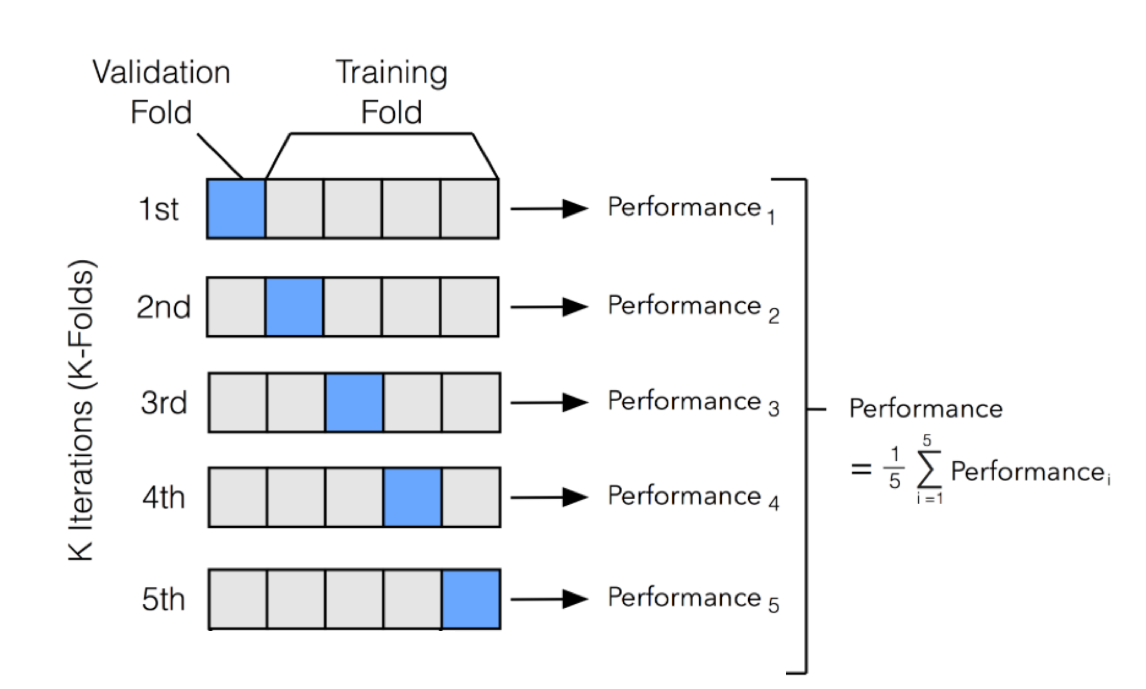

We can use evaluationScheme and the difference is that, instead of specifying the percentage of data to put in the training set, we will define how many chunks we want. The argument is k, like the number of repetitions in the previous examples.
Clearly, we don't need to specify train anymore:


In [22]:
n_fold <- 4
eval_sets <- evaluationScheme(data = ratings_movies, method = "cross-validation",
k = n_fold, given = items_to_keep, goodRating = rating_threshold)

In [23]:
eval_sets

Evaluation scheme with 15 items given
Method: ‘cross-validation’ with 4 run(s).
Good ratings: >=3.000000
Data set: 560 x 332 rating matrix of class ‘realRatingMatrix’ with 55298 ratings.

In [24]:
size_sets <- sapply(eval_sets@runsTrain, length)
size_sets

[1] 420 420 420 420

### Exercise 4 (1 point)

In previous code we split our original dataset using a k-fold validation schema, a.k.a leave one out. Can you write the same code to use a k=10?

**Answer:**

In [25]:
## INSERT CODE HERE
n_fold <- 10
eval_sets <- evaluationScheme(data = ratings_movies, method = "cross-validation",
k = n_fold, given = items_to_keep, goodRating = rating_threshold)

eval_sets

size_sets <- sapply(eval_sets@runsTrain, length)
size_sets

Evaluation scheme with 15 items given
Method: ‘cross-validation’ with 10 run(s).
Good ratings: >=3.000000
Data set: 560 x 332 rating matrix of class ‘realRatingMatrix’ with 55298 ratings.

[1] 504 504 504 504 504 504 504 504 504 504

### Exercise 5 (0.5 points)

A couple of cells above, we compute the size of each training dataset using the following code


```
n_fold <- 4
eval_sets <- evaluationScheme(data = ratings_movies, method = "cross-validation",
k = n_fold, given = items_to_keep, goodRating = rating_threshold)
size_sets <- sapply(eval_sets@runsTrain, length)
size_sets
#420 420 420 420
```
Can you explain why if we are using a n_fold = 4 we obtain a training dataset that contains 420 out of 560 users.

**Answer:**

Because the original size is 560 users, by taking k fold of 4 we're splitting 560 into 4 parts and leaving one part out, so the training set will contain 560 * (3/4) = 420. Same logic applies when we take k fold of 10, we will obtain a training set of 560*(9/10) = 504.


### Exercise 6 (0.5 points)

Please do the same that in exercise 5, but using a n_fold = 5. What is the size_sets and why?

**Answer:**


By taking k fold, of 5 we're splitting the original data set of 560 users into 5 parts and leaving one part out for testing, so the size set will contain 560 users * (4/5) = 448 users.

In [ ]:
## INSERT YOUR CODE HERE
n_fold <- 5
eval_sets <- evaluationScheme(data = ratings_movies, method = "cross-validation",
k = n_fold, given = items_to_keep, goodRating = rating_threshold)

eval_sets

size_sets <- sapply(eval_sets@runsTrain, length)
size_sets

Evaluation scheme with 15 items given
Method: ‘cross-validation’ with 5 run(s).
Good ratings: >=3.000000
Data set: 560 x 332 rating matrix of class ‘realRatingMatrix’ with 55298 ratings.

[1] 448 448 448 448 448

# Evaluation of Item based collaborative filtering (IBCF)

## Evaluating rating 

In order to recommend items to new users, collaborative filtering estimates the ratings of items that are not yet rated. Then, it recommends the top-rated items. Let's forget about the last step. We can evaluate the model by comparing the estimated ratings with the real ones.

First, let's prepare the data for validation, as shown in the previous section. Since the k-fold is the most accurate approach, we will use it here:

In [27]:
n_fold <- 4
items_to_keep <- 15
rating_threshold <- 3
eval_sets <- evaluationScheme(data = ratings_movies, method = "cross-validation",
k = n_fold, given = items_to_keep, goodRating = rating_threshold)

We need to define the model to evaluate. Let's build it using the Recommender function. We need to specify the name of the model and the list of its parameters. If we use their defaults, then it's NULL:

In [28]:
model_to_evaluate <- "IBCF"
model_parameters <- NULL

In [29]:
eval_recommender <- Recommender(data = getData(eval_sets, "train"), method = model_to_evaluate, parameter = model_parameters)

In [30]:
items_to_recommend <- 10

In [31]:
eval_prediction <- predict(object = eval_recommender, 
                  newdata =getData(eval_sets, "known"), n = items_to_recommend, type = "ratings")
class(eval_prediction)

[1] "realRatingMatrix"
attr(,"package")
[1] "recommenderlab"

The `eval_prediction` object is a rating matrix. Let's see how many movies we are recommending to each user. For this purpose, we can visualize the distribution of the number of movies per user:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



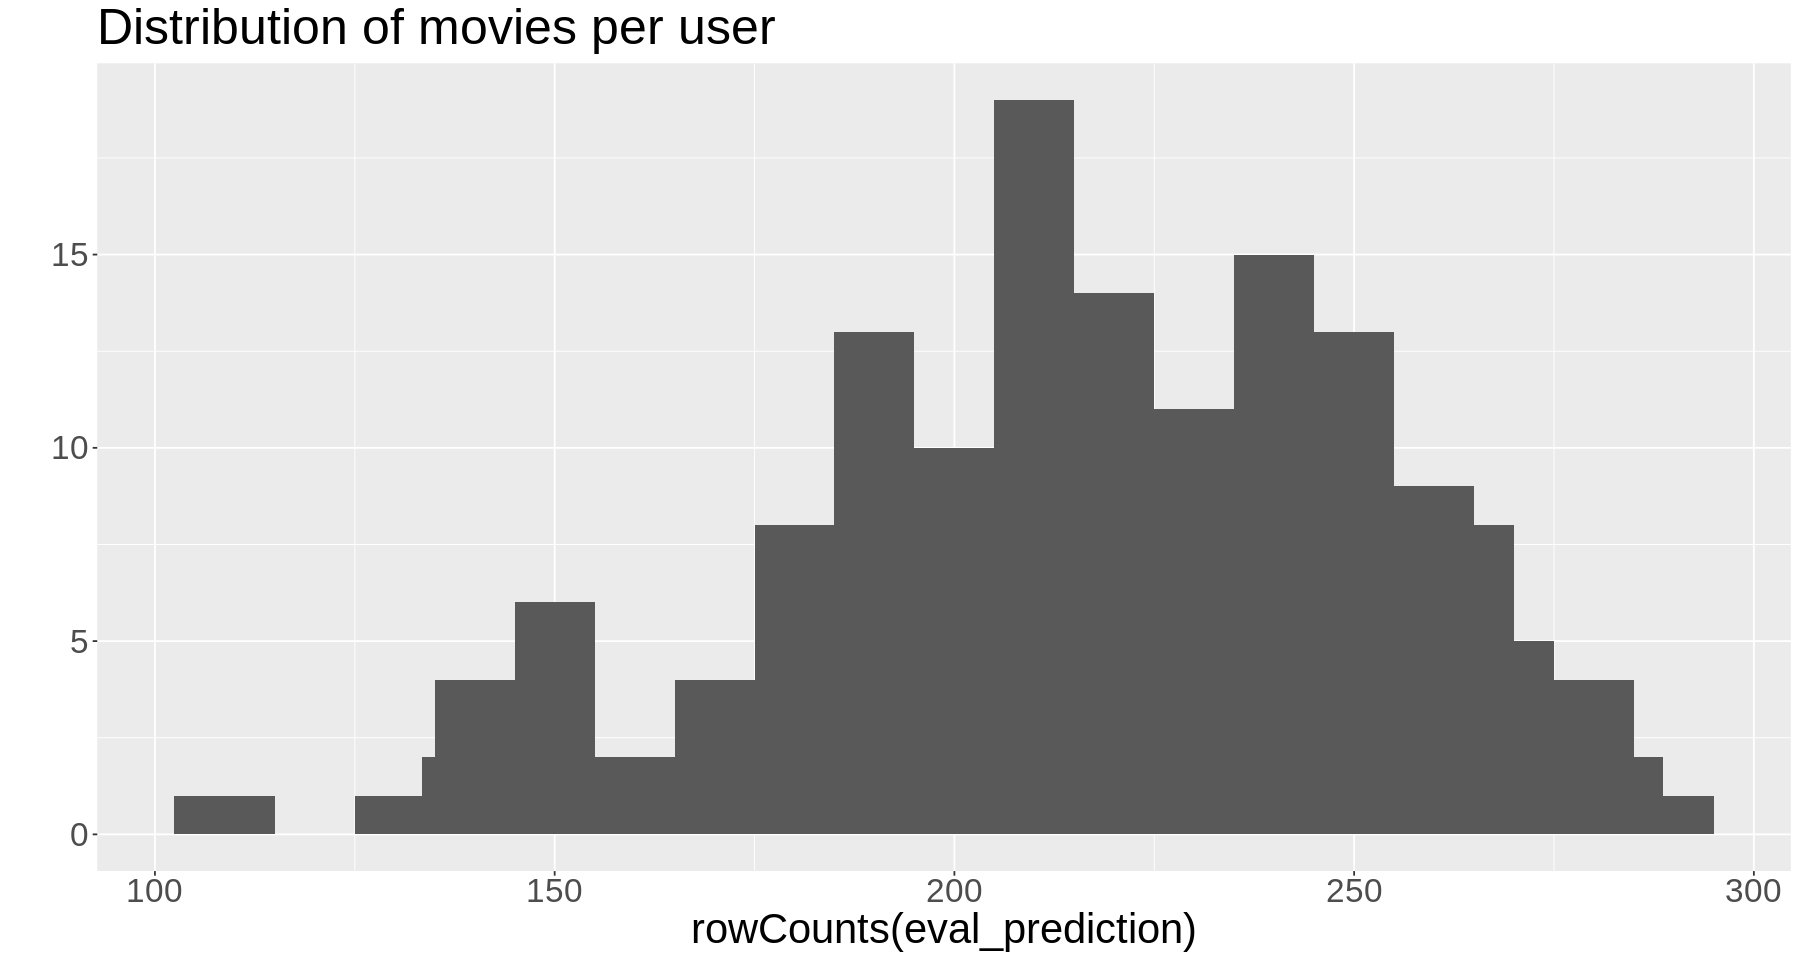

In [32]:
qplot(rowCounts(eval_prediction)) + geom_histogram(binwidth = 10) +
ggtitle("Distribution of movies per user") + theme(text = element_text(size = 25))  

The function to measure the accuracy is calcPredictionAccuracy and it computes
the following aspects:
- Root mean square error (RMSE): This is the standard deviation of the difference between the real and predicted ratings (errors).
\begin{equation} 
RMSE = \sqrt{\frac{\sum_{i=1}^{N}{e_i^2}}{N}}
\end{equation}
- Mean squared error (MSE): This is the mean of the squared difference between the real and predicted ratings. It's the square of RMSE, so it contains
the same information
\begin{equation} 
MSE = \frac{\sum_{i=1}^{N}{({e})^2}}{N}
\end{equation}
- Mean absolute error (MAE): This is the mean of the absolute difference between the real and predicted ratings.
\begin{equation} 
\frac{1}{n}\sum_{i=1}^{N}|e_i|
\end{equation} 


In [33]:
eval_accuracy <- calcPredictionAccuracy(
x = eval_prediction, data = getData(eval_sets, "unknown"))

In [34]:
eval_accuracy

RMSE      MSE      MAE 
1.391008 1.934902 1.059960

We can compute these measures about each user by specifying byUser = TRUE

In [35]:
eval_accuracy <- calcPredictionAccuracy(
x = eval_prediction, data = getData(eval_sets, "unknown"), byUser =TRUE)
head(eval_accuracy)

,RMSE,MSE,MAE
2,1.388730,1.9285714,0.9285714
7,2.095607,4.3915706,1.5744385
8,1.790430,3.2056385,1.4219883
14,0.867510,0.7525737,0.6611360
28,1.571608,2.4699532,1.3702057
44,1.052433,1.1076155,0.7828776


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



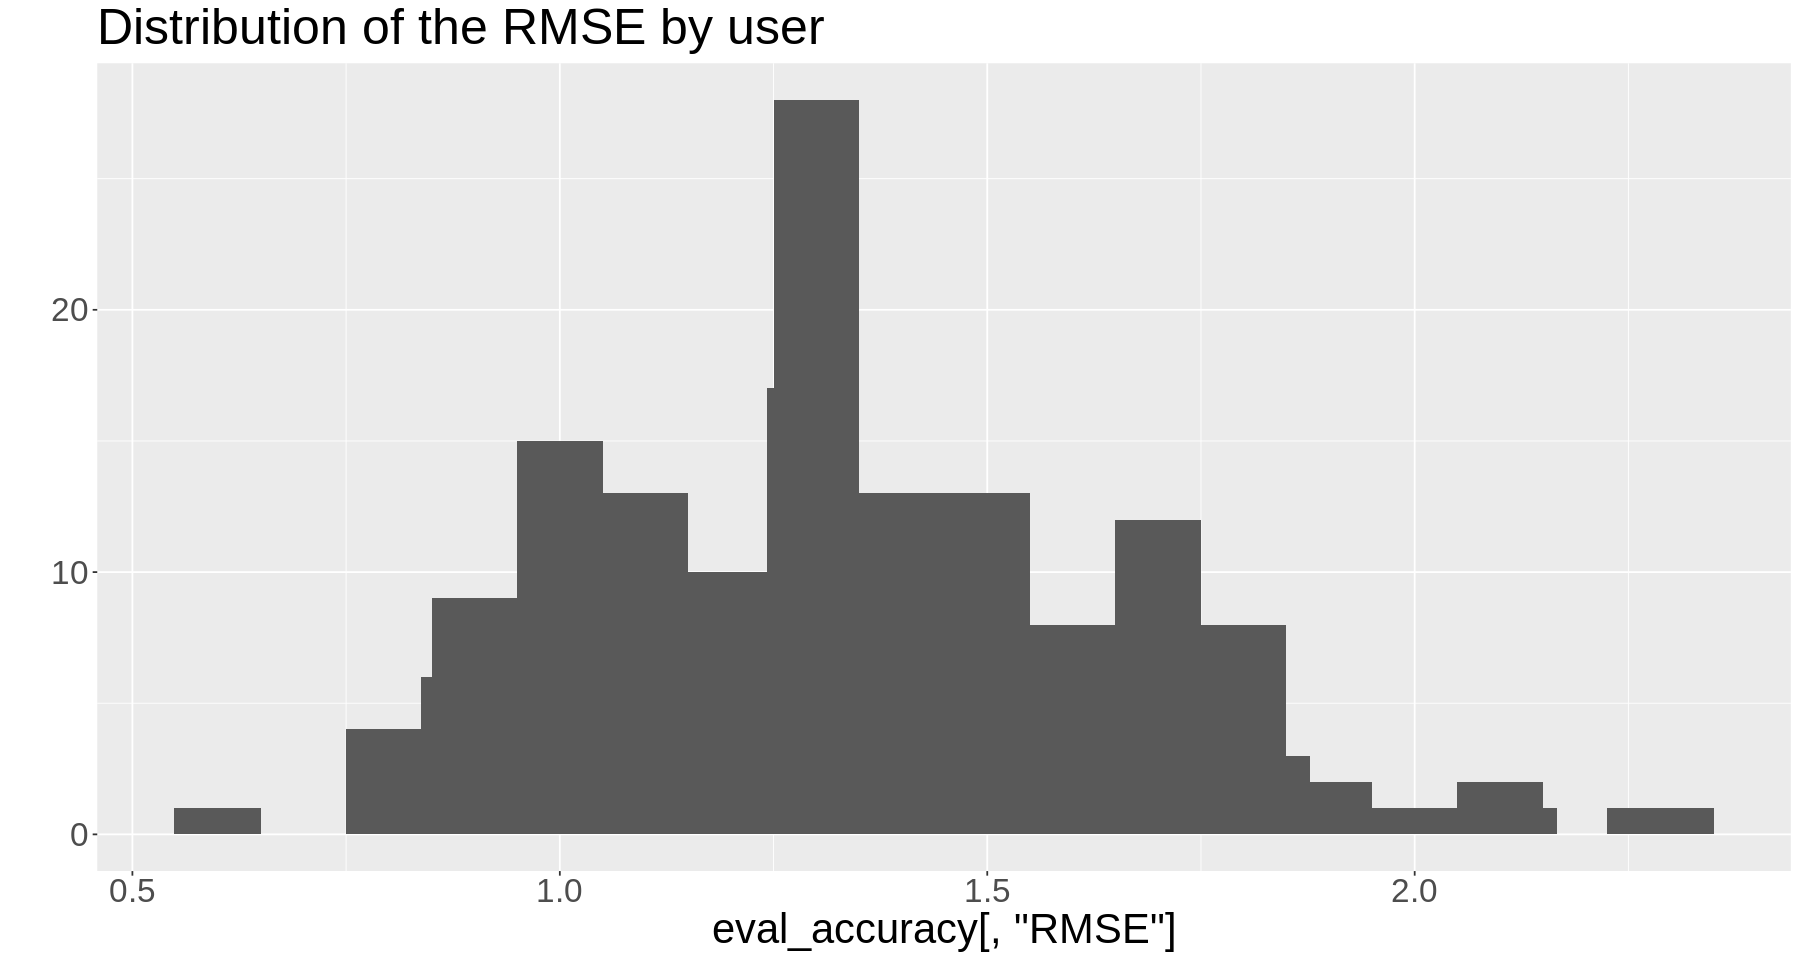

In [36]:
qplot(eval_accuracy[, "RMSE"]) + geom_histogram(binwidth = 0.1) +
ggtitle("Distribution of the RMSE by user")+theme(text = element_text(size = 25))  

## Exercise 7 (1 point)

Please draw a similar graph like the one above, but using the MAE.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



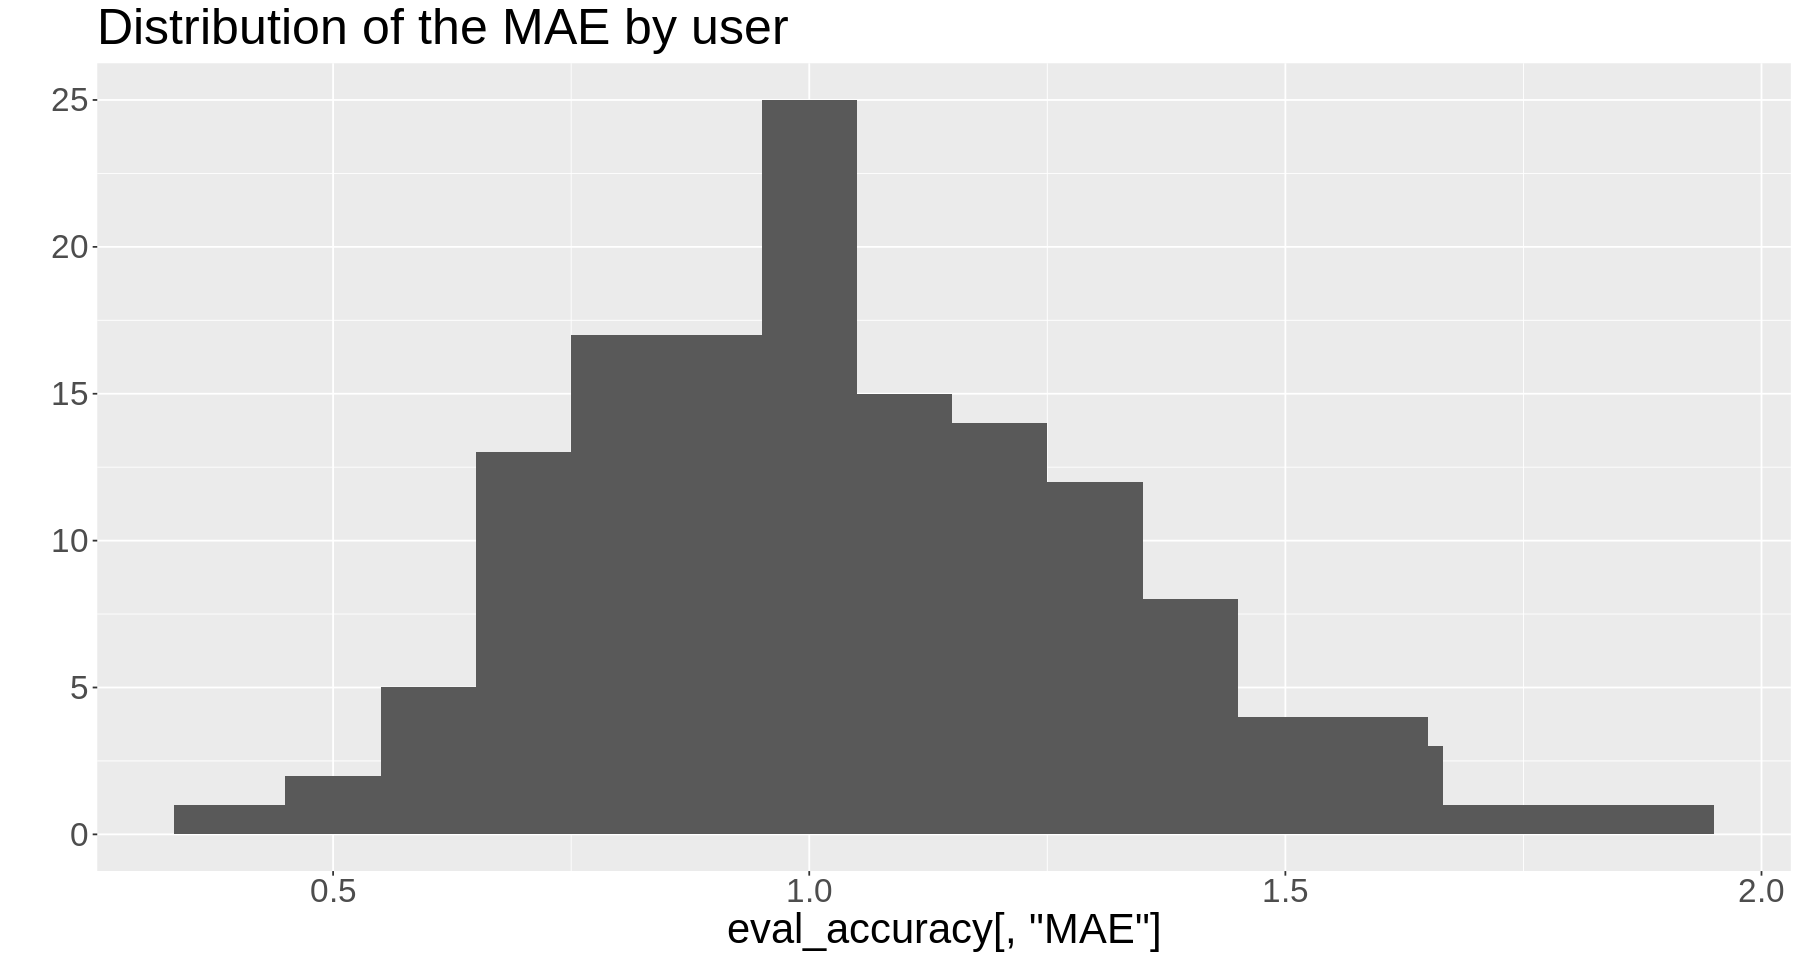

In [37]:
## INSERT CODE HERE
qplot(eval_accuracy[, "MAE"]) + geom_histogram(binwidth = 0.1) +
ggtitle("Distribution of the MAE by user")+theme(text = element_text(size = 25))  

#Evaluation of Item based collaborative filtering (UBCF)



## Exercise 8 (2 point)

Please repeat all the required step in order to measure the MSE, RMSE and MAE if you use an user based collaborative filtering. 

**Answer:**

In [38]:
model_to_evaluate <- "UBCF"
model_parameters <- NULL

In [39]:
eval_recommender <- Recommender(data = getData(eval_sets, "train"), method = model_to_evaluate, parameter = model_parameters)

In [40]:
items_to_recommend <- 10

In [41]:
eval_prediction <- predict(object = eval_recommender, 
                  newdata =getData(eval_sets, "known"), n = items_to_recommend, type = "ratings")
class(eval_prediction)

[1] "realRatingMatrix"
attr(,"package")
[1] "recommenderlab"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



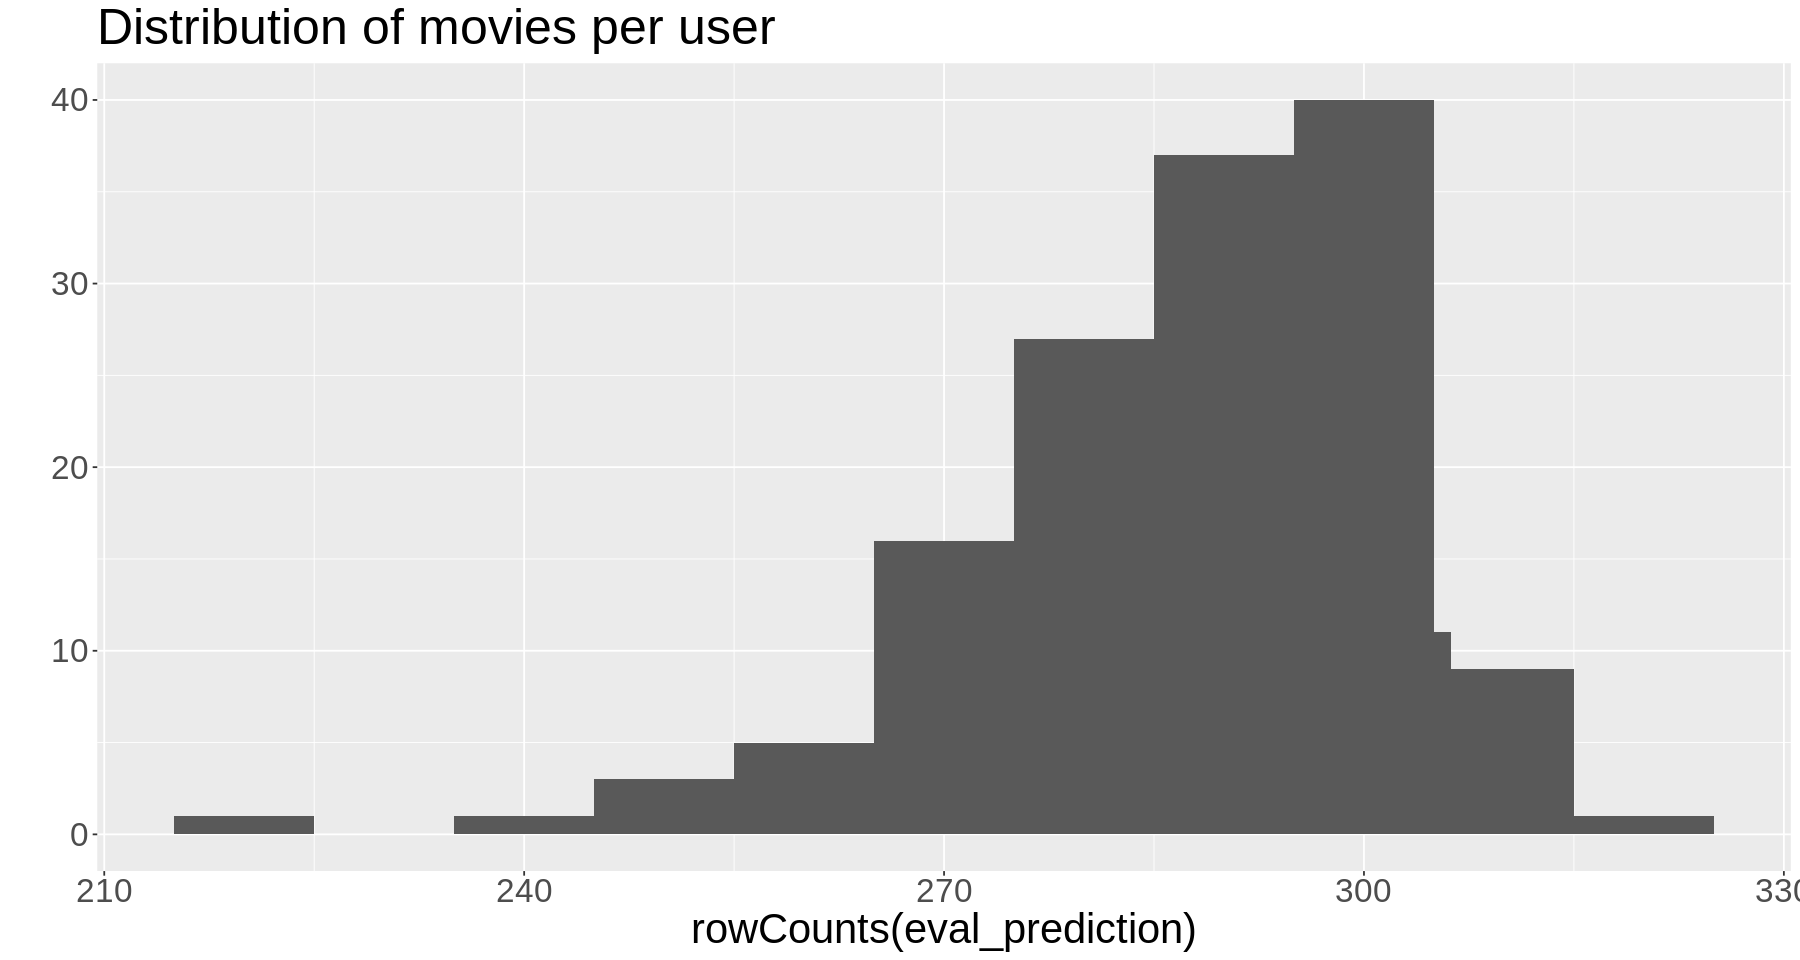

In [42]:
qplot(rowCounts(eval_prediction)) + geom_histogram(binwidth = 10) +
ggtitle("Distribution of movies per user") + theme(text = element_text(size = 25))  

In [43]:
eval_accuracy <- calcPredictionAccuracy(
x = eval_prediction, data = getData(eval_sets, "unknown"))

In [44]:
eval_accuracy

RMSE       MSE       MAE 
1.1216926 1.2581943 0.8769443

In [45]:
eval_accuracy <- calcPredictionAccuracy(
x = eval_prediction, data = getData(eval_sets, "unknown"), byUser =TRUE)
head(eval_accuracy)

,RMSE,MSE,MAE
2,1.187263,1.409593,0.8513501
7,1.129289,1.275293,0.8786083
8,1.099292,1.208444,0.8676700
14,1.135435,1.289213,0.9623786
28,1.084113,1.175301,0.8569907
44,1.078946,1.164125,0.8139405


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



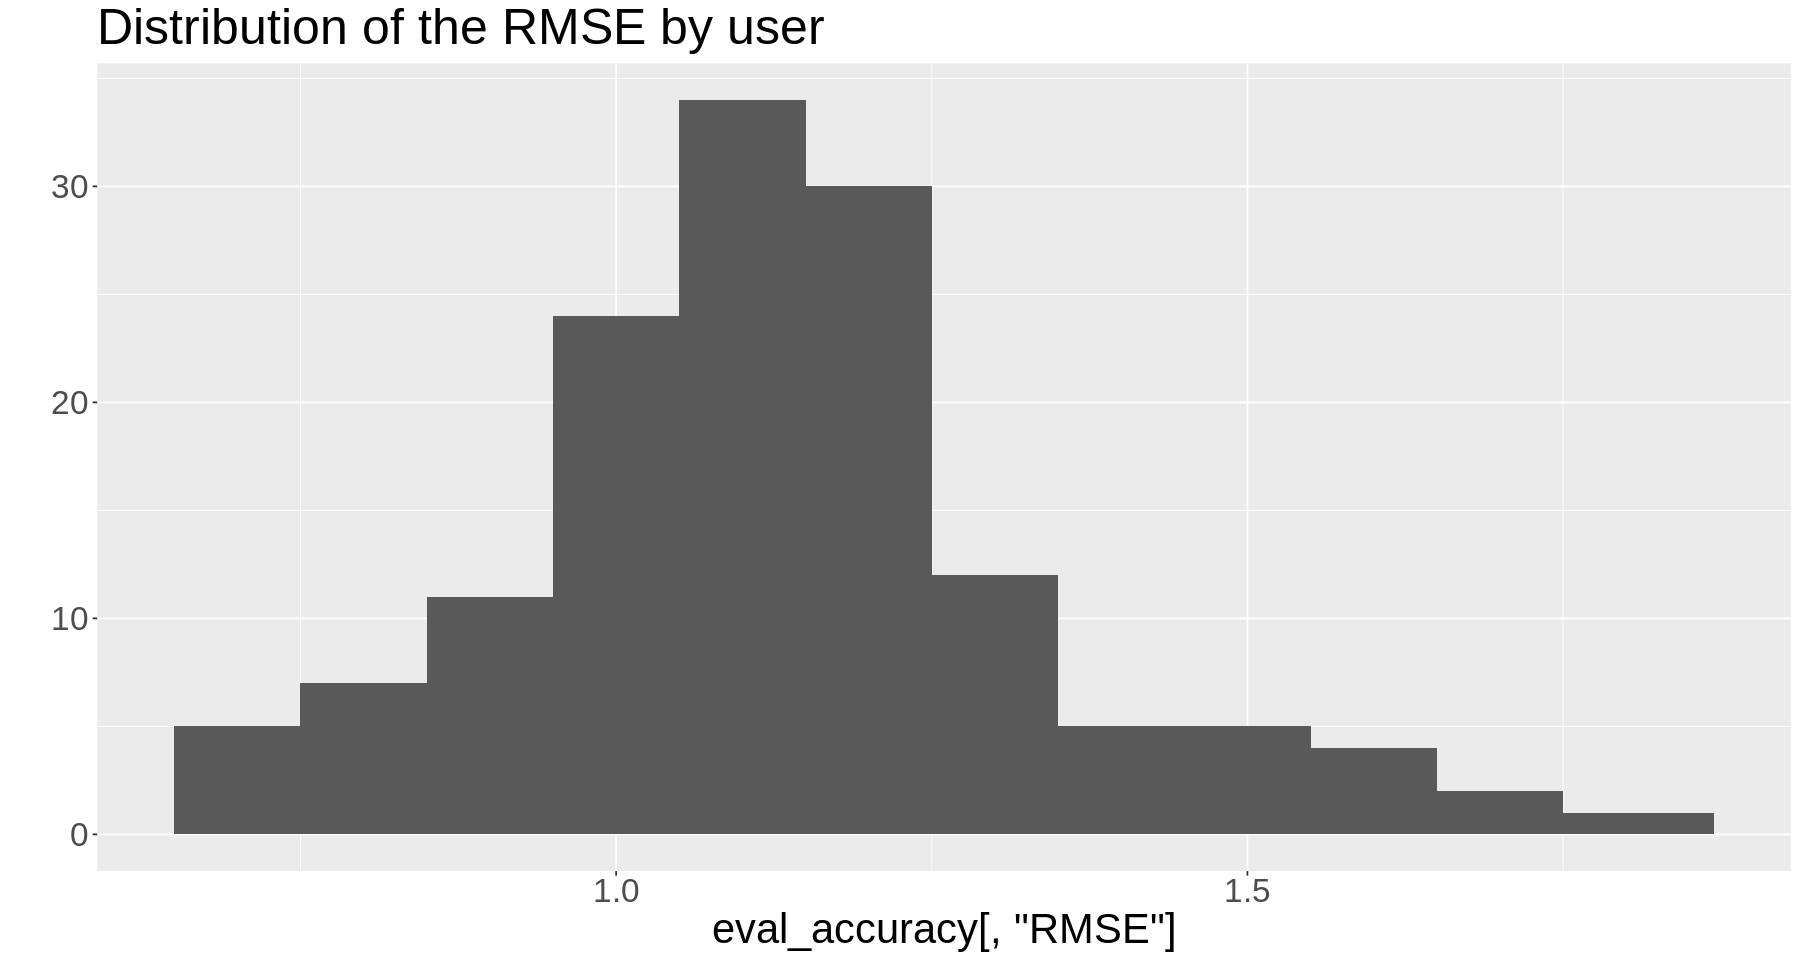

In [46]:
qplot(eval_accuracy[, "RMSE"]) + geom_histogram(binwidth = 0.1) +
ggtitle("Distribution of the RMSE by user")+theme(text = element_text(size = 25))  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



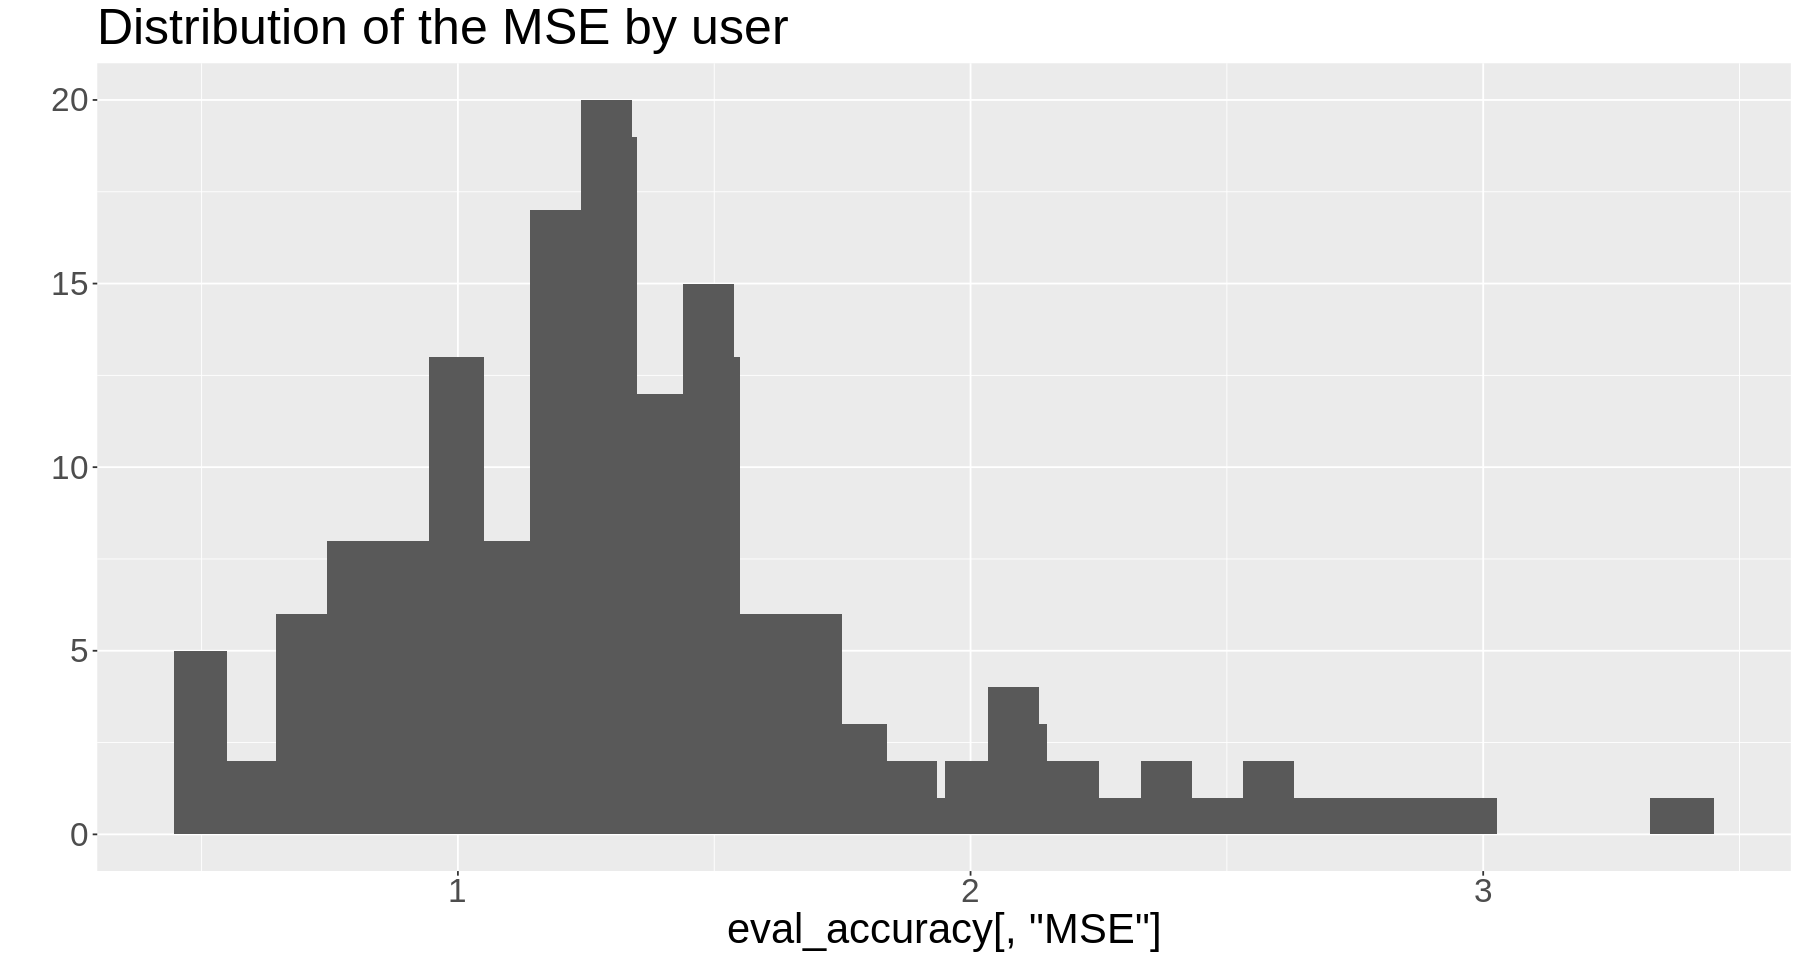

In [47]:
qplot(eval_accuracy[, "MSE"]) + geom_histogram(binwidth = 0.1) +
ggtitle("Distribution of the MSE by user")+theme(text = element_text(size = 25)) 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



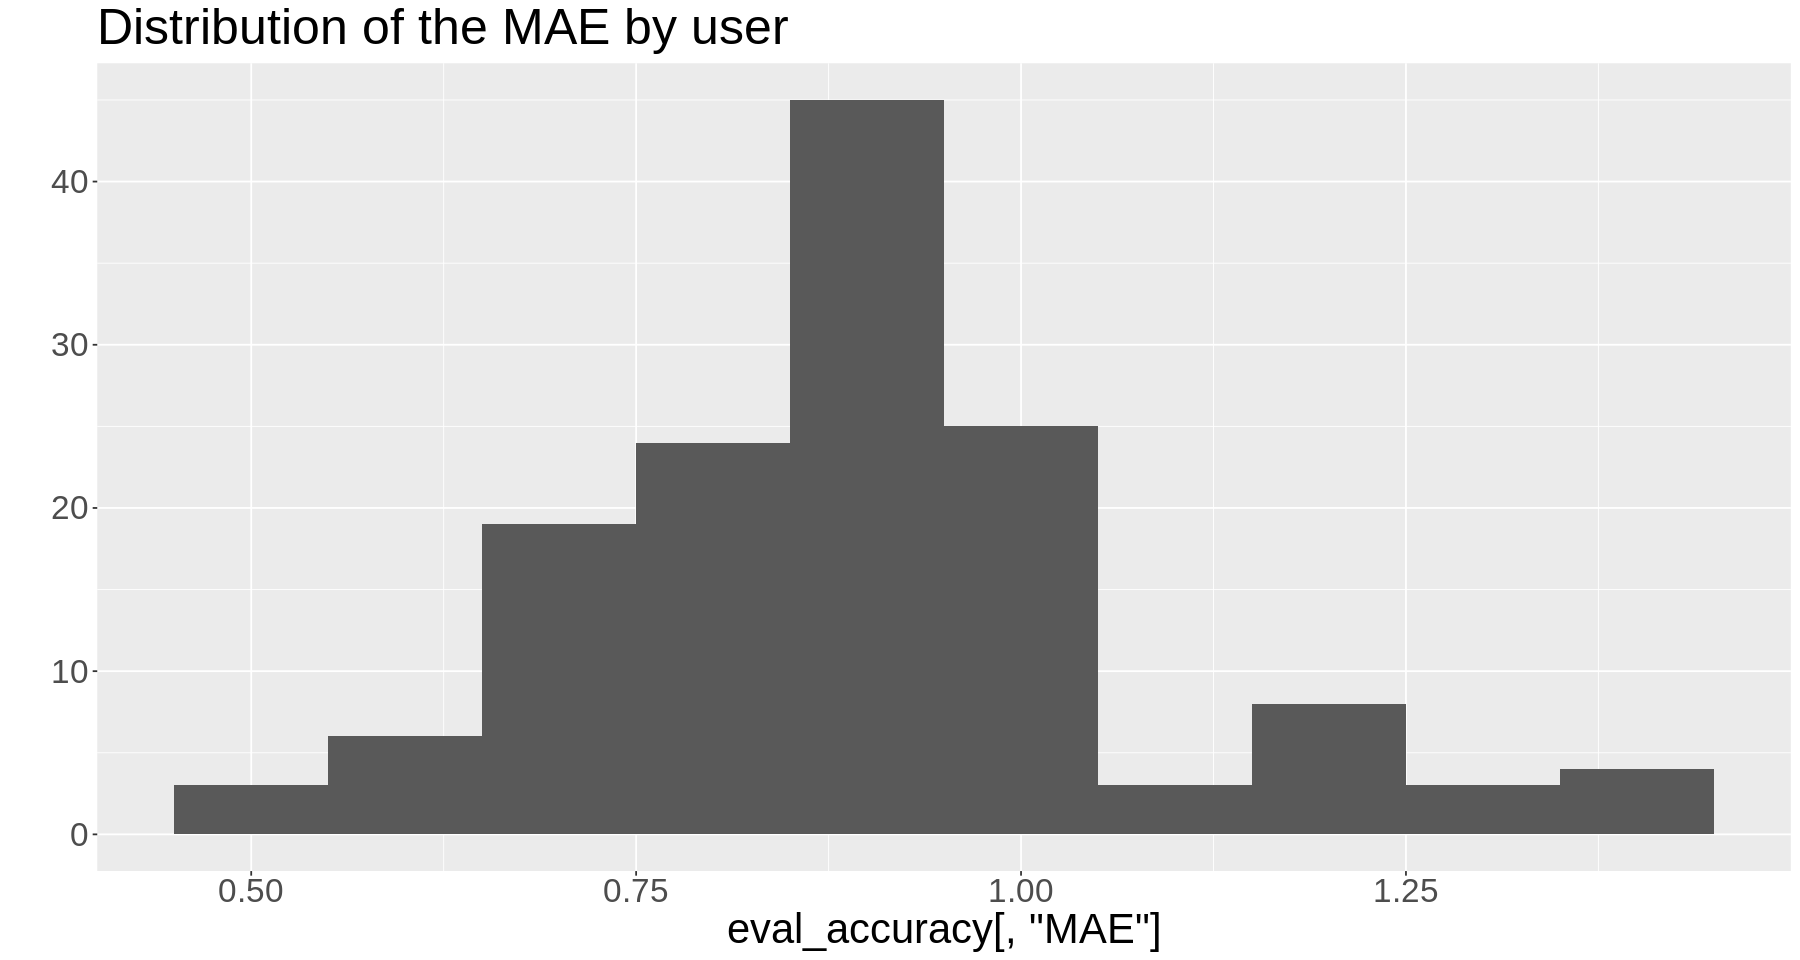

In [48]:
qplot(eval_accuracy[, "MAE"]) + geom_histogram(binwidth = 0.1) +
ggtitle("Distribution of the MAE by user")+theme(text = element_text(size = 25)) 

# Evaluating the recommendation


Another way to measure accuracies is by comparing the recommendations with the purchases having a positive rating. For this purpose, we can use the prebuilt `evaluate` function. Its inputs are as follows:
- x: This is the object containing the evaluation scheme.
- method: This is the recommendation technique.
- n: This is the number of items to recommend to each user. If we can specify a vector of n, the function will evaluate the recommender performance
depending on n. 

We have already defined a threshold, rating_threshold <- 3, for positive ratings,
and this parameter is already stored inside eval_sets. The progress = FALSE argument suppresses a progress report:

In [49]:
results <- evaluate(x = eval_sets, method = model_to_evaluate, n =seq(10, 100, 10))
class(results)
## evaluationResults

UBCF run fold/sample [model time/prediction time]
	 1  [0.006sec/0.303sec] 
	 2  [0.004sec/0.33sec] 
	 3  [0.005sec/0.286sec] 
	 4  [0.006sec/0.297sec] 


[1] "evaluationResults"
attr(,"package")
[1] "recommenderlab"

The results object is an evaluationResults object containing the results of the evaluation. Using getConfusionMatrix, we can extract a list of confusion matrices. Each element of the list corresponds to a different split of the k-fold. Let's take a look at the first element. 

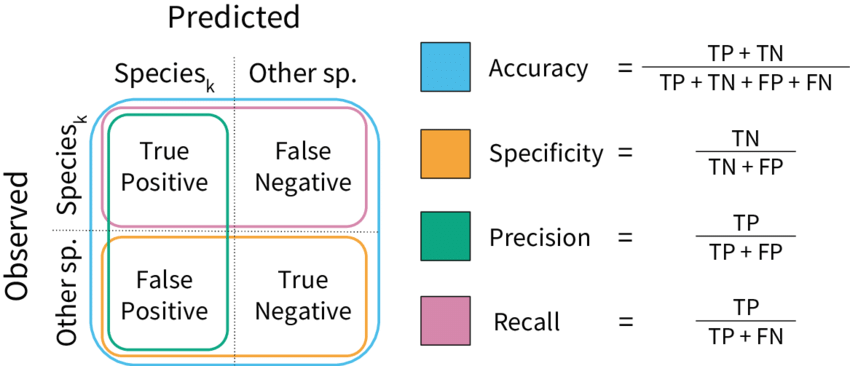

In [50]:
head(getConfusionMatrix(results)[[3]]) 
## we get the result for the first run, 
##take into account that are runion a 4-fold cross validaiton

TP,FP,FN,TN,N,precision,recall,TPR,FPR,n
2.550000,7.45000,72.67143,234.3286,317,0.2550000,0.03469015,0.03469015,0.03079100,10
5.278571,14.72143,69.94286,227.0571,317,0.2639286,0.06926214,0.06926214,0.06046582,20
8.064286,21.93571,67.15714,219.8429,317,0.2688095,0.10611704,0.10611704,0.09003358,30
10.900000,29.10000,64.32143,212.6786,317,0.2725000,0.14197399,0.14197399,0.11913675,40
13.842857,36.15714,61.37857,205.6214,317,0.2768571,0.18220991,0.18220991,0.14806758,50
16.678571,43.32143,58.54286,198.4571,317,0.2779762,0.22014696,0.22014696,0.17731669,60


First, let's build the ROC curve. It displays these factors:
- **True Positive Rate (TPR):** This is the percentage of rated items that have been recommended. It's the number of TP divided by the number of rated items (TP + FN).
- **False Positive Rate (FPR)**: This is the percentage of not rated items that have been recommended. It's the number of FP divided by the number of not
rated items (FP + TN).

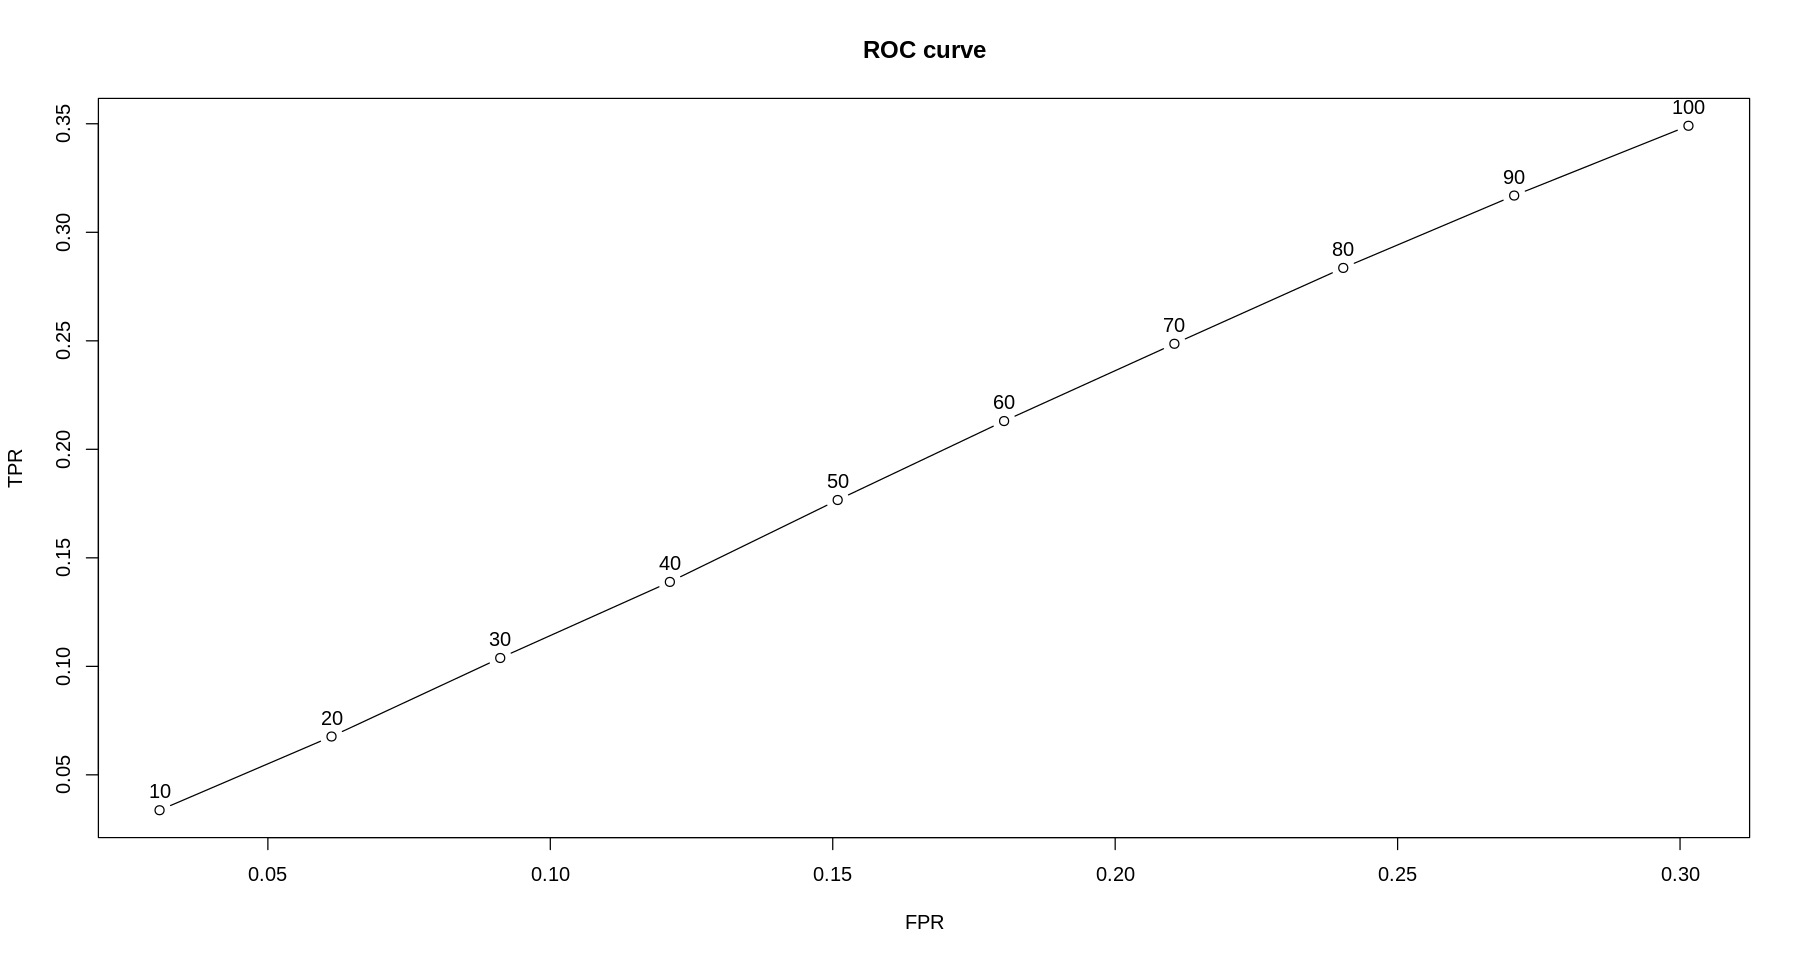

In [51]:
plot(results, annotate = TRUE, main = "ROC curve")

- **Precision:** This is the percentage of recommended items that have been rated. It's the number of FP divided by the total number of positives (TP + FP).
- **Recall:** This is the percentage of purchased items that have been recommended. It's the number of TP divided by the total number of rated (TP + FN). It's also equal to the True Positive Rate.

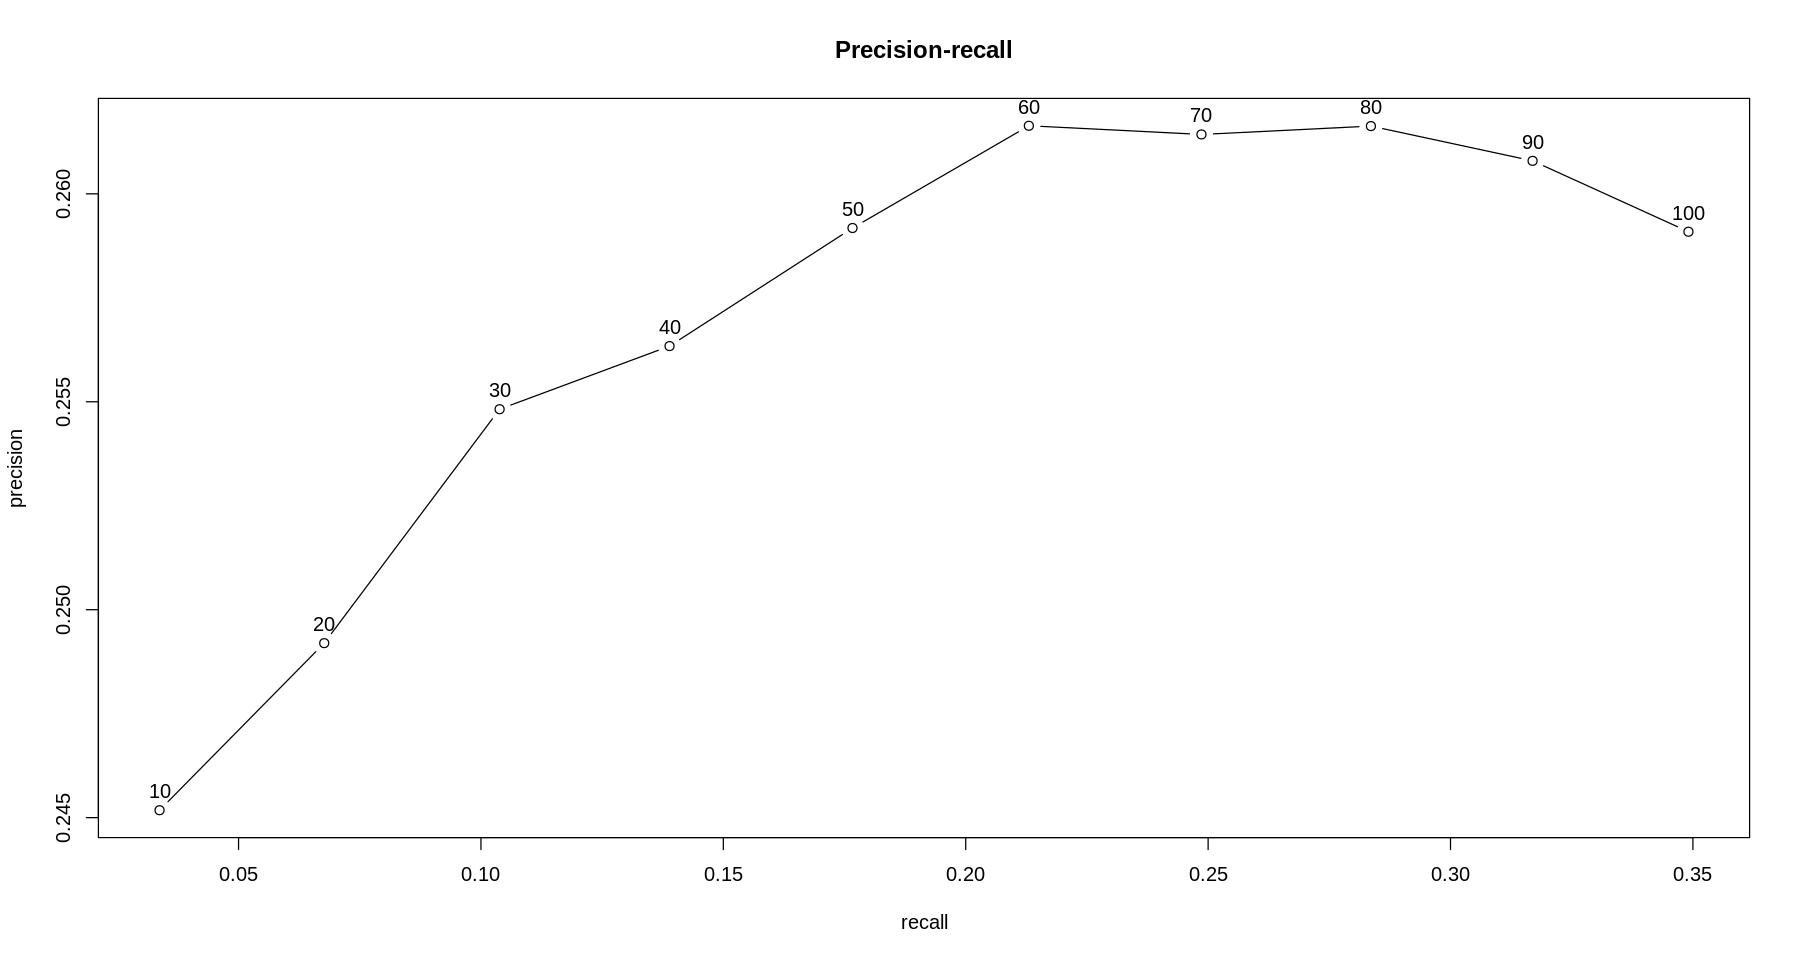

In [52]:
plot(results, "prec/rec", annotate = TRUE, main = "Precision-recall")

## Comparing model and identifying the best

In order to evaluate different models, we can define a list with them. We can build
the following filtering:
- Item-based collaborative filtering, using the Cosine as the distance function
- Item-based collaborative filtering, using the Pearson correlation as the distance function
- User-based collaborative filtering, using the Cosine as the distance function
- User-based collaborative filtering, using the Pearson correlation as the
distance function
- Random recommendations to have a base line

In [53]:
models_to_evaluate <- list(
IBCF_cos = list(name = "IBCF", param = list(method ="cosine")),
UBCF_cos = list(name = "UBCF", param = list(method ="cosine")),
random = list(name = "RANDOM", param=NULL)
)

In [54]:
n_recommendations <- c(1, 5, seq(10, 100, 10))
list_results <- evaluate(x = eval_sets, method = models_to_evaluate, n= n_recommendations)
class(list_results)## evaluationResultList

IBCF run fold/sample [model time/prediction time]
	 1  [0.194sec/0.047sec] 
	 2  [0.225sec/0.039sec] 
	 3  [0.427sec/0.037sec] 
	 4  [0.195sec/0.036sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.273sec] 
	 2  [0.006sec/0.282sec] 
	 3  [0.004sec/0.273sec] 
	 4  [0.005sec/0.287sec] 
RANDOM run fold/sample [model time/prediction time]
	 1  [0.001sec/0.05sec] 
	 2  [0.001sec/0.046sec] 
	 3  [0.001sec/0.047sec] 
	 4  [0.001sec/0.05sec] 


[1] "evaluationResultList"
attr(,"package")
[1] "recommenderlab"

Each element of list_results is an `evaluationResults` object. We can extract the
related average confusion matrices using avg:

In [55]:
avg_matrices <- lapply(list_results, avg)

In [56]:
head(avg_matrices$IBCF_cos[, 5:8])

N,precision,recall,TPR
317,0.3303571,0.004710073,0.004710073
317,0.2885714,0.019981707,0.019981707
317,0.2716071,0.037081033,0.037081033
317,0.2589286,0.071462627,0.071462627
317,0.2507143,0.105195031,0.105195031
317,0.2464286,0.137653525,0.137653525


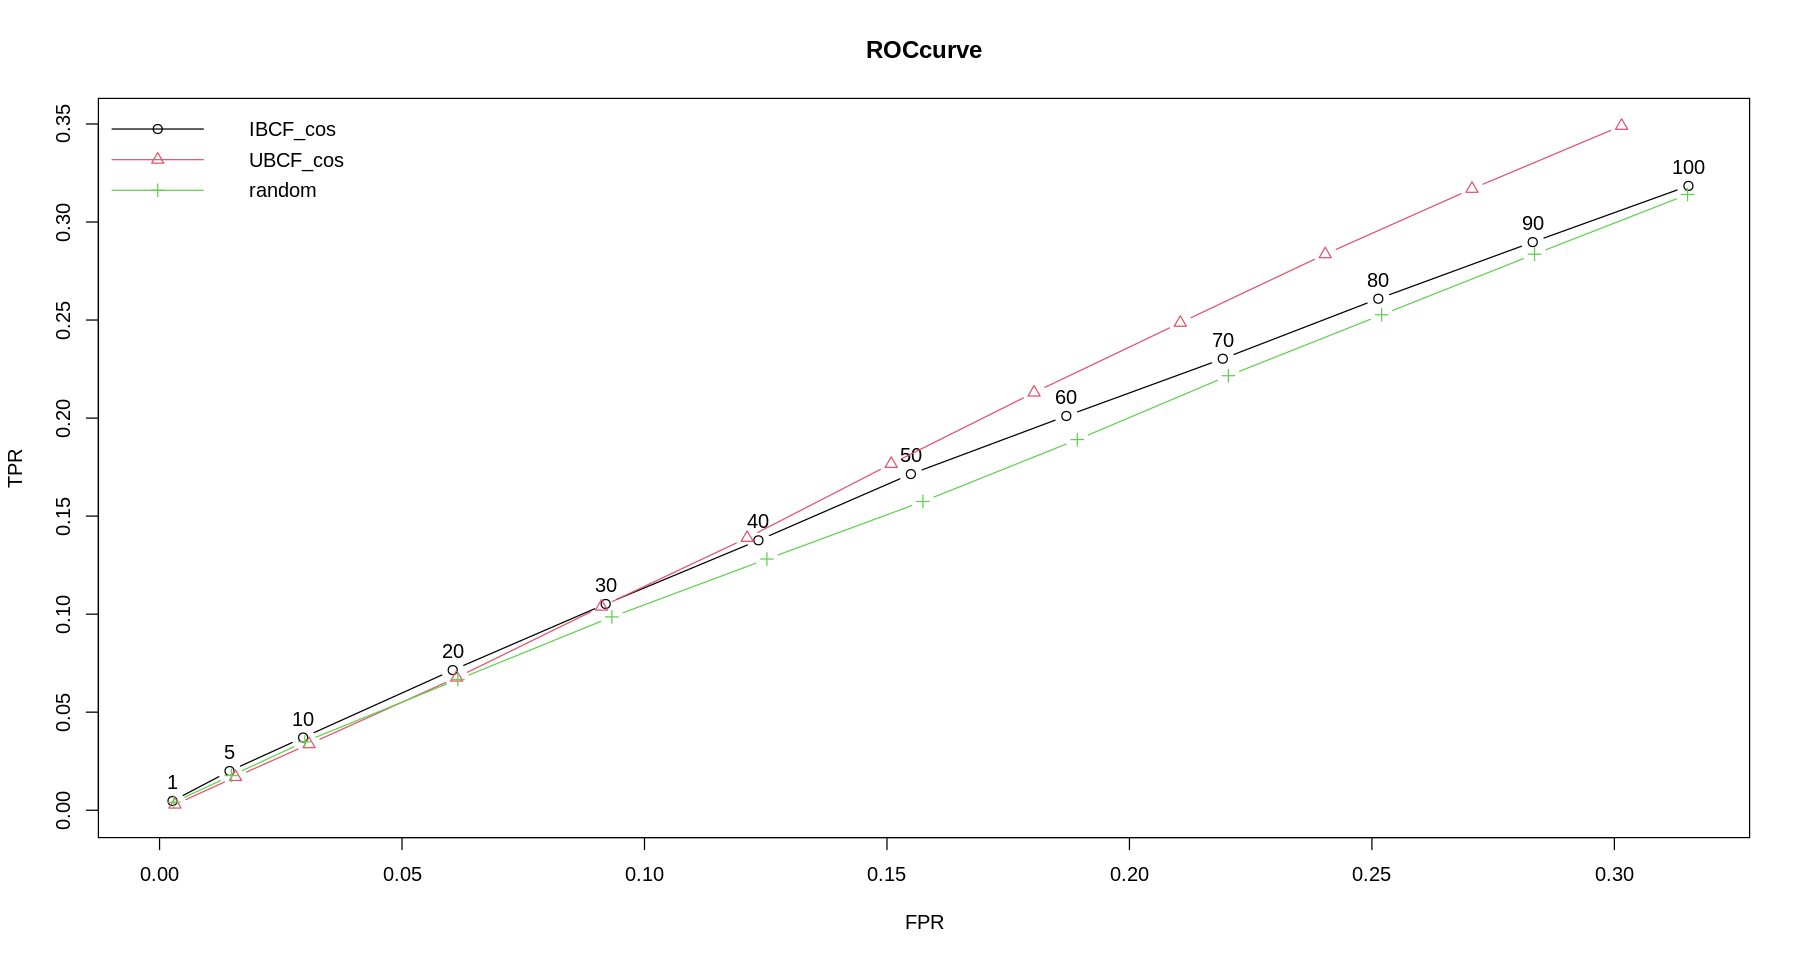

In [57]:
plot(list_results, annotate = 1, legend = "topleft") 
title("ROCcurve")

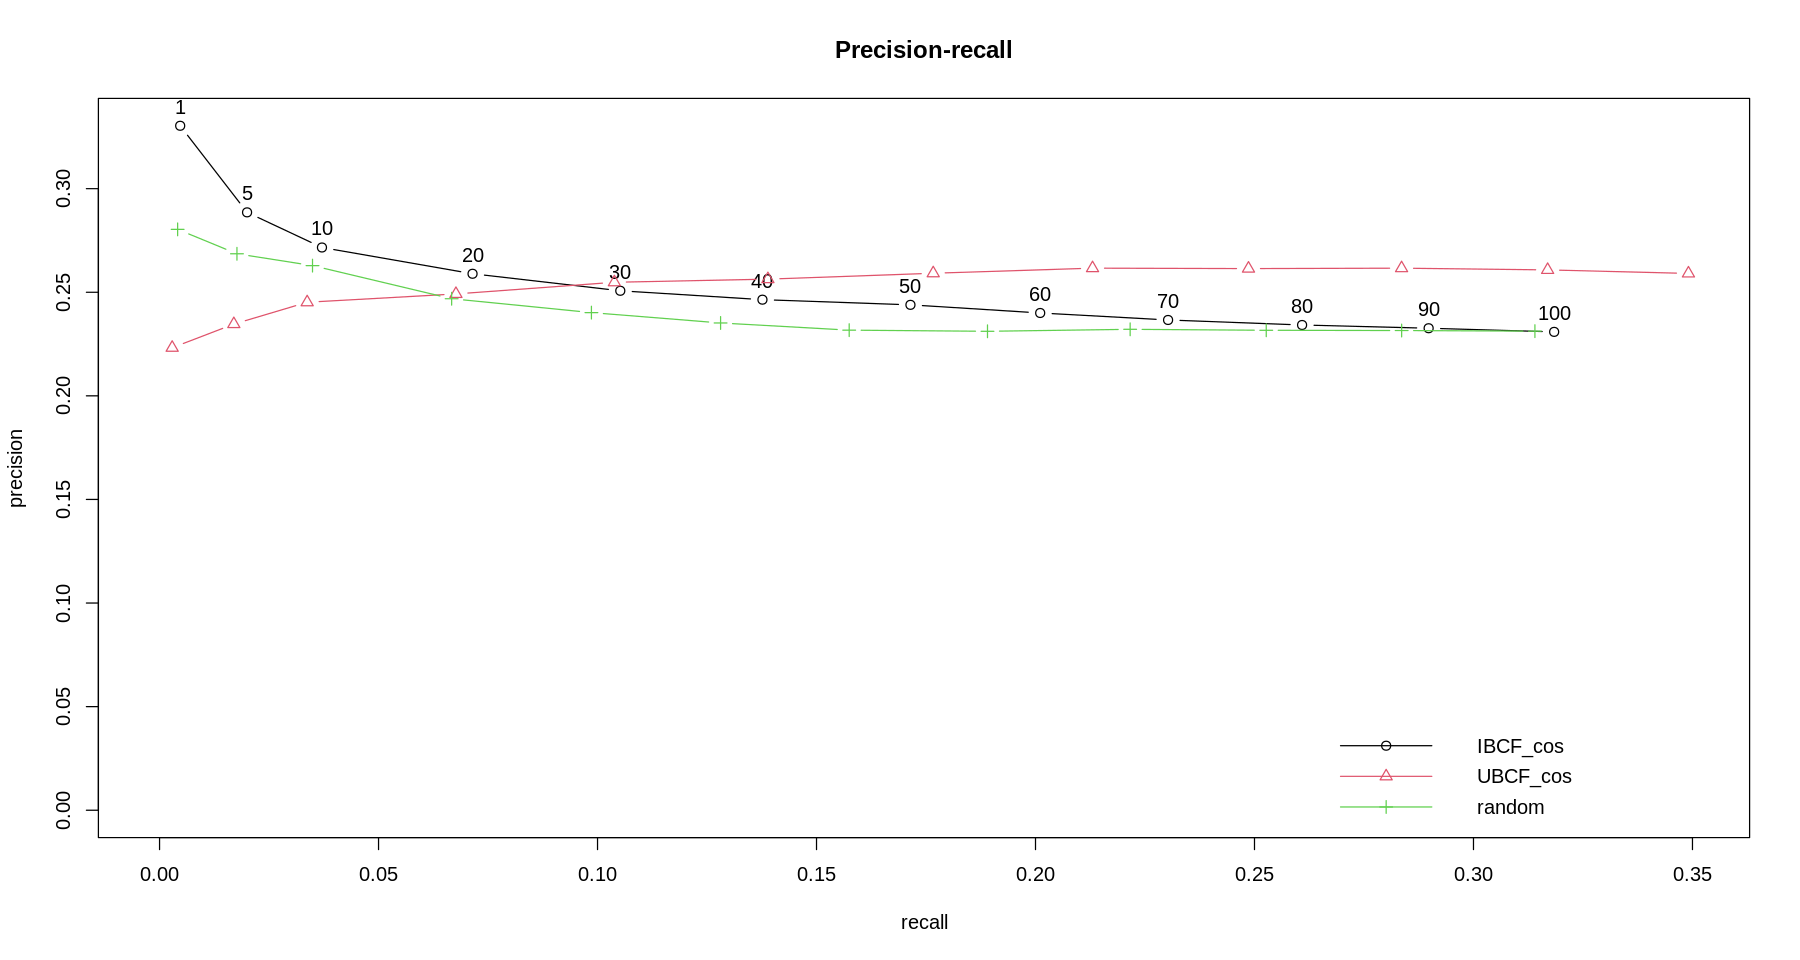

In [58]:
plot(list_results, "prec/rec", annotate = 1, legend = "bottomright")
title("Precision-recall")

### Exercise 9 (1 point) 

Add to our original list of models to test the IBCF_cor and the UBCF_cor using in both cases the pearson correlation. 

```
models_to_evaluate <- list(
IBCF_cos = list(name = "IBCF", param = list(method ="cosine")),
UBCF_cos = list(name = "UBCF", param = list(method ="cosine")),
random = list(name = "RANDOM", param=NULL)
)
```

Then plot the ROC and precission-recall curve. 

**Answer:**

IBCF run fold/sample [model time/prediction time]
	 1  [0.192sec/0.046sec] 
	 2  [0.195sec/0.283sec] 
	 3  [0.191sec/0.037sec] 
	 4  [0.18sec/0.036sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.272sec] 
	 2  [0.004sec/0.27sec] 
	 3  [0.004sec/0.268sec] 
	 4  [0.005sec/0.281sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [0.252sec/0.046sec] 
	 2  [0.254sec/0.048sec] 
	 3  [0.49sec/0.036sec] 
	 4  [0.259sec/0.037sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.301sec] 
	 2  [0.004sec/0.303sec] 
	 3  [0.004sec/0.313sec] 
	 4  [0.005sec/0.299sec] 
RANDOM run fold/sample [model time/prediction time]
	 1  [0.002sec/0.04sec] 
	 2  [0.002sec/0.039sec] 
	 3  [0.001sec/0.039sec] 
	 4  [0.001sec/0.04sec] 


[1] "evaluationResultList"
attr(,"package")
[1] "recommenderlab"

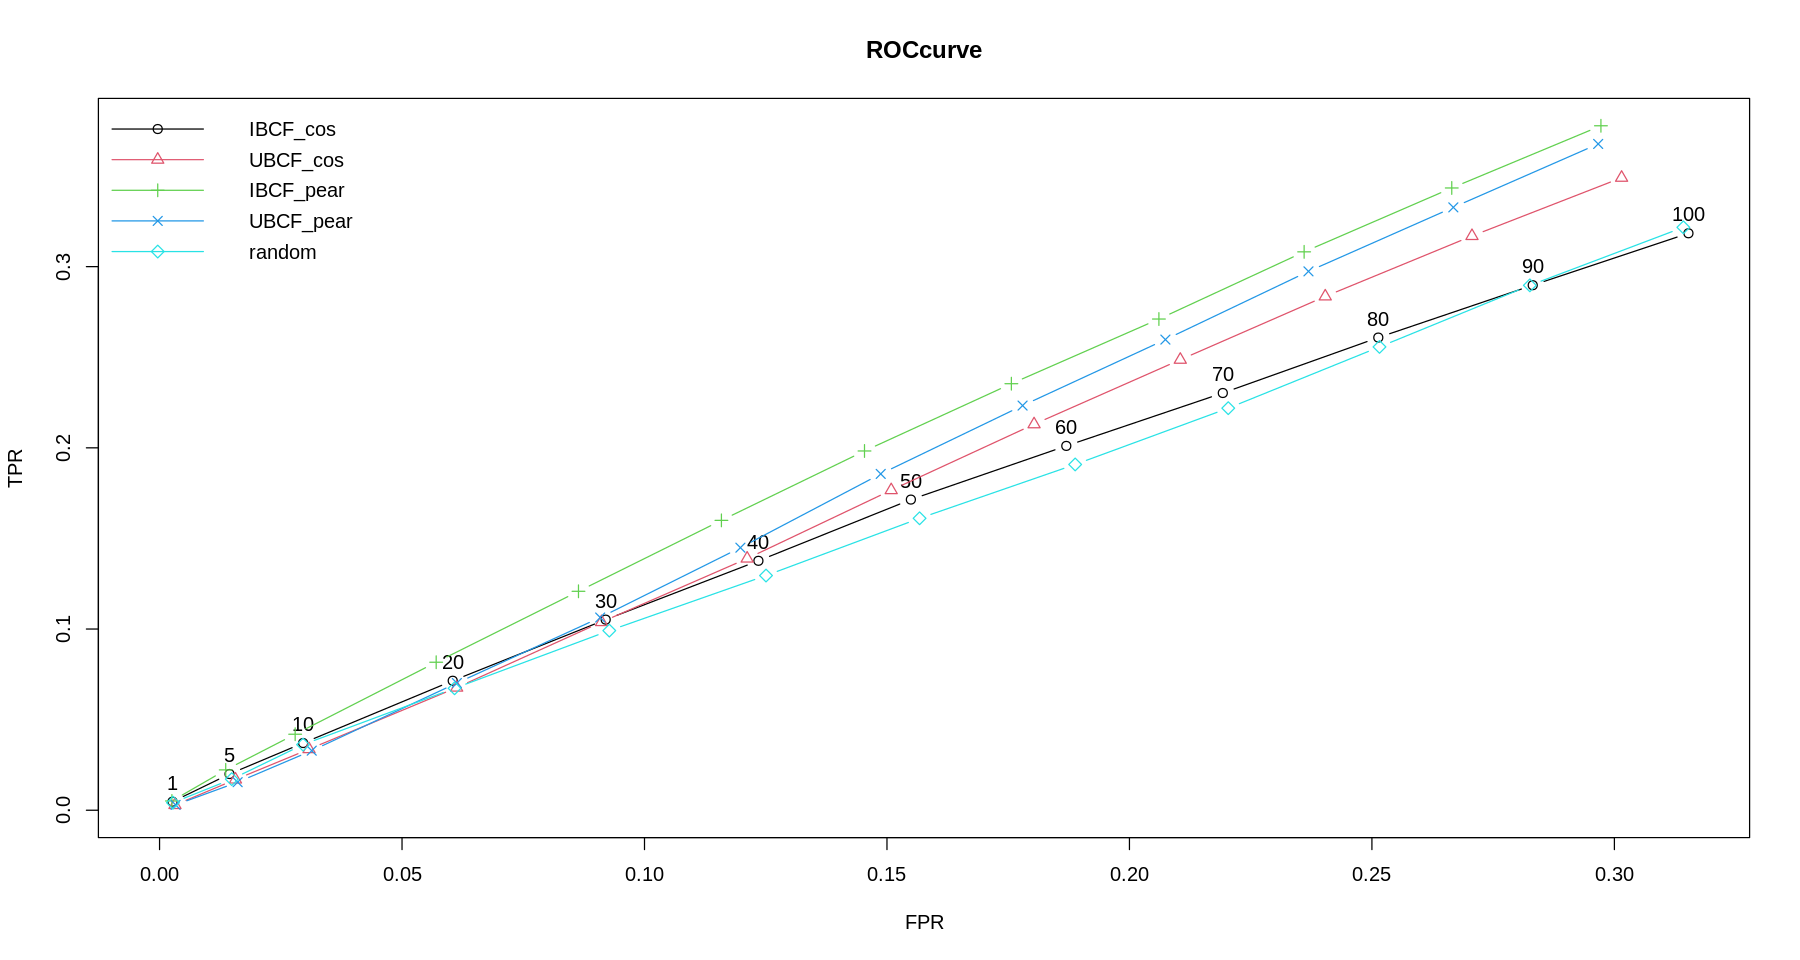

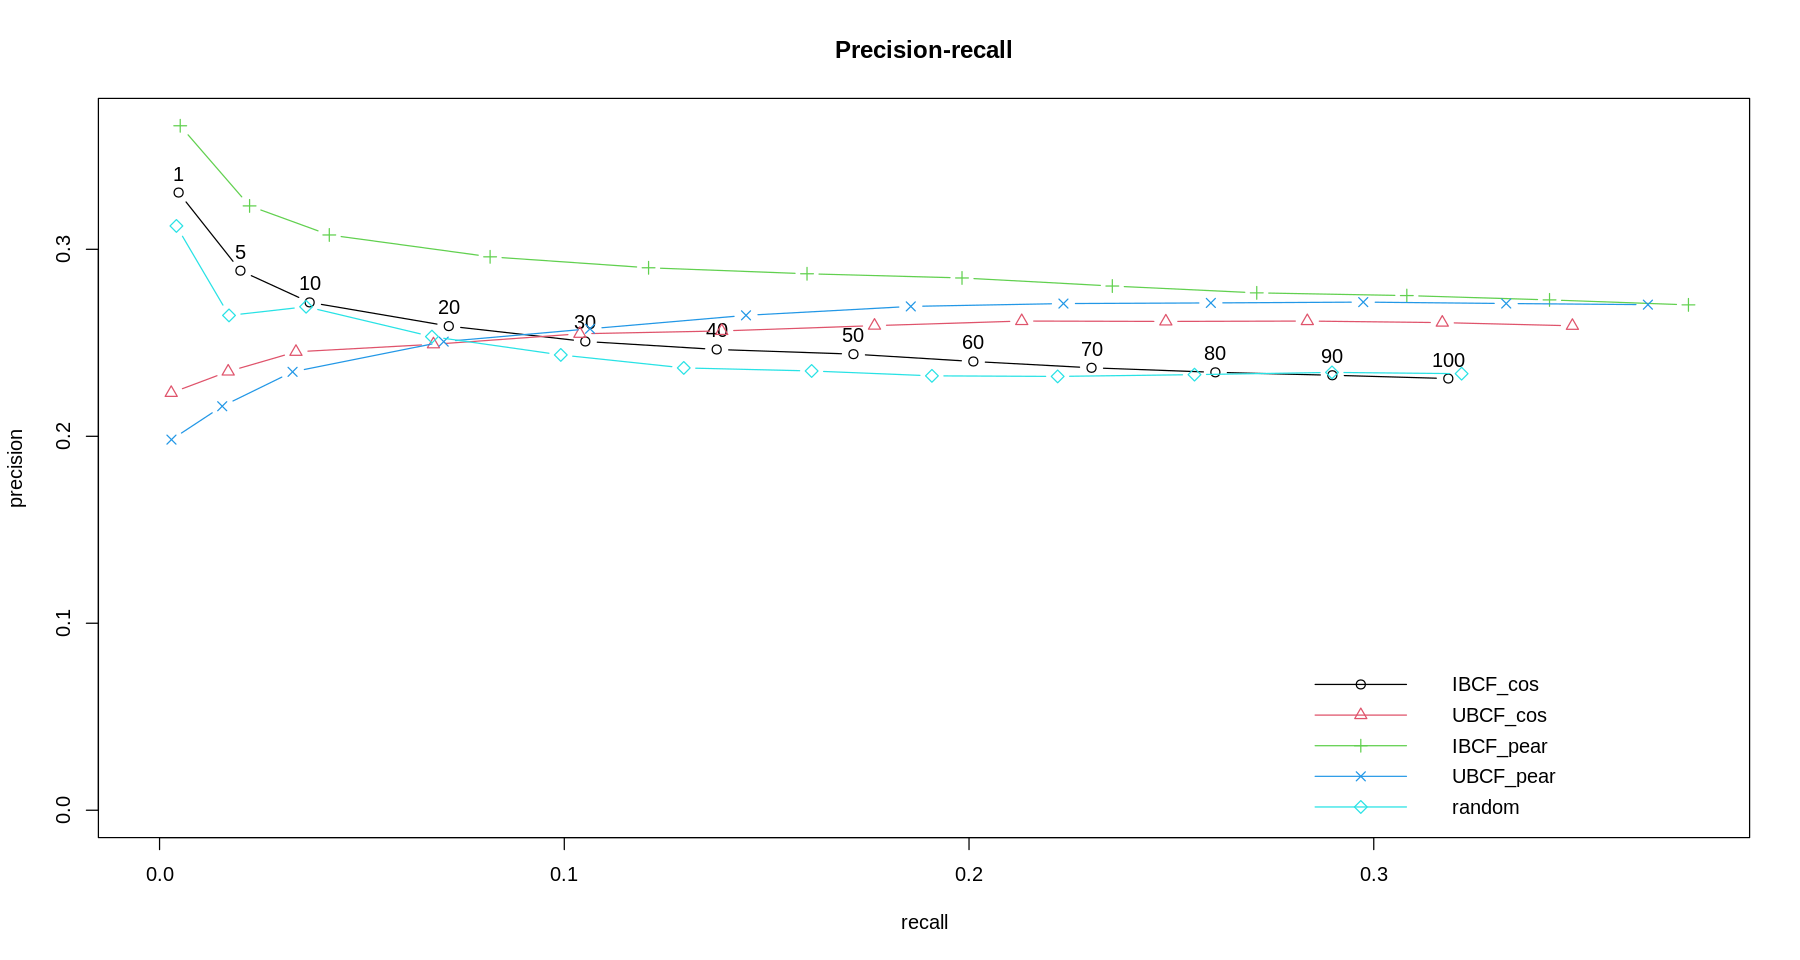

In [59]:
## INSERT YOUR CODE HERE
models_to_evaluate <- list(
IBCF_cos = list(name = "IBCF", param = list(method ="cosine")),
UBCF_cos = list(name = "UBCF", param = list(method ="cosine")),
IBCF_pear = list(name = "IBCF", param = list(method ="Pearson")),
UBCF_pear = list(name = "UBCF", param = list(method ="Pearson")),
random = list(name = "RANDOM", param=NULL)
)

n_recommendations <- c(1, 5, seq(10, 100, 10))
list_results <- evaluate(x = eval_sets, method = models_to_evaluate, n= n_recommendations)
class(list_results)## evaluationResultList

plot(list_results, annotate = 1, legend = "topleft") 
title("ROCcurve")
plot(list_results, "prec/rec", annotate = 1, legend = "bottomright")
title("Precision-recall")


## Optimizing the number of neighbours

Recommendation models often contain some numeric parameters. For instance, IBCF takes into account of the k-closest items. How can we optimize k? In a similar way to categoric parameters, we can test different values of a numeric parameter. In this case, we also need to define which values we want to test. So far, we left k to its default value: 30. Now, we can explore more values, ranging between 5 and 40:

In [60]:
vector_k <- c(5, 10, 20, 30, 40)
models_to_evaluate <- lapply(vector_k, function(k){
list(name = "IBCF", param = list(method = "cosine", k = k))
})
names(models_to_evaluate) <- paste0("IBCF_k_", vector_k)

In [61]:
n_recommendations <- c(1, 5, seq(10, 100, 10))
list_results <- evaluate(x = eval_sets, method = models_to_evaluate, n= n_recommendations)

IBCF run fold/sample [model time/prediction time]
	 1  [0.182sec/0.024sec] 
	 2  [0.184sec/0.032sec] 
	 3  [0.196sec/0.023sec] 
	 4  [0.418sec/0.023sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [0.189sec/0.028sec] 
	 2  [0.189sec/0.027sec] 
	 3  [0.188sec/0.026sec] 
	 4  [0.186sec/0.028sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [0.18sec/0.041sec] 
	 2  [0.19sec/0.033sec] 
	 3  [0.19sec/0.032sec] 
	 4  [0.18sec/0.04sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [0.184sec/0.054sec] 
	 2  [0.19sec/0.035sec] 
	 3  [0.182sec/0.036sec] 
	 4  [0.181sec/0.046sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [0.191sec/0.041sec] 
	 2  [0.185sec/0.046sec] 
	 3  [0.189sec/0.039sec] 
	 4  [0.192sec/0.043sec] 


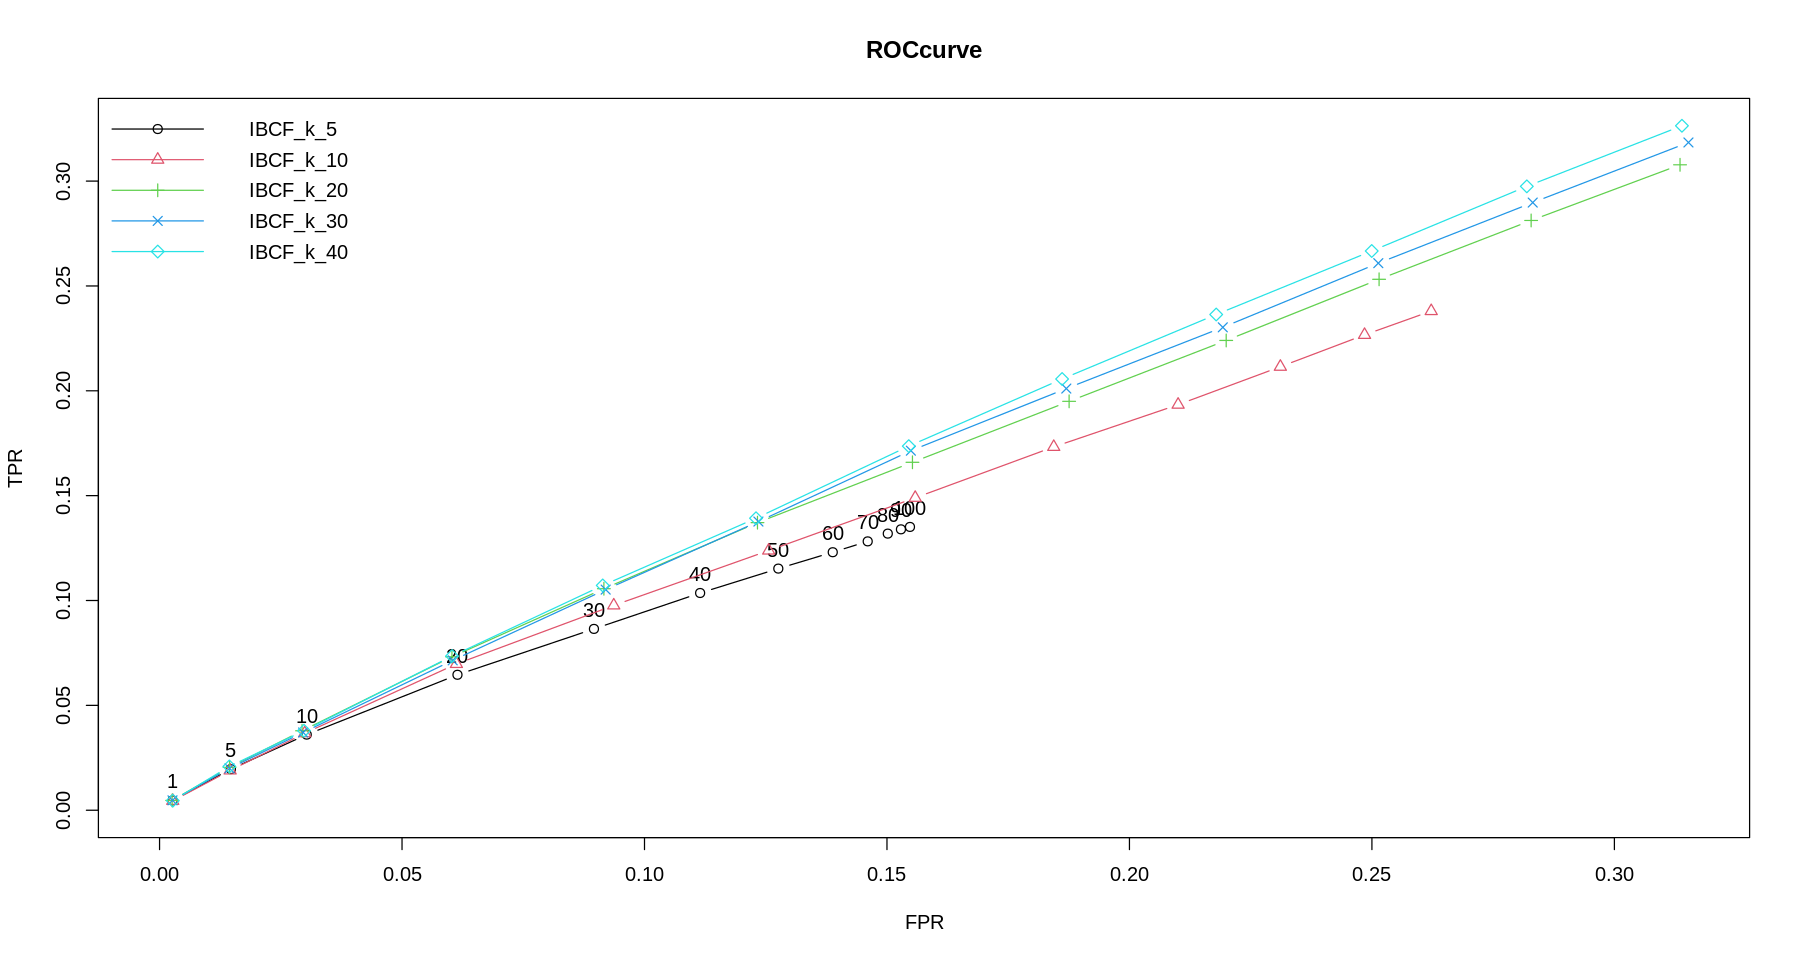

In [62]:
plot(list_results, annotate = 1, legend = "topleft") 
title("ROCcurve")

### Exercise 10 (1 point)

In previous section we optimized the parameter k for the IBCF, using cosine distance, please do the same but with the UBCF, using the same distance metric. 



**Answer:**

In [63]:
models_to_evaluate <- list(
UBCF_cos = list(name = "UBCF", param = list(method ="cosine"))
)

In [64]:
vector_k <- c(5, 10, 20, 30, 40)
models_to_evaluate <- lapply(vector_k, function(k){
list(name = "UBCF", param = list(method = "cosine", nn = k))})
names(models_to_evaluate) <- paste0("UBCF_k_", vector_k)

In [65]:
models_to_evaluate

$UBCF_k_5
$UBCF_k_5$name
[1] "UBCF"

$UBCF_k_5$param
$UBCF_k_5$param$method
[1] "cosine"

$UBCF_k_5$param$nn
[1] 5



$UBCF_k_10
$UBCF_k_10$name
[1] "UBCF"

$UBCF_k_10$param
$UBCF_k_10$param$method
[1] "cosine"

$UBCF_k_10$param$nn
[1] 10



$UBCF_k_20
$UBCF_k_20$name
[1] "UBCF"

$UBCF_k_20$param
$UBCF_k_20$param$method
[1] "cosine"

$UBCF_k_20$param$nn
[1] 20



$UBCF_k_30
$UBCF_k_30$name
[1] "UBCF"

$UBCF_k_30$param
$UBCF_k_30$param$method
[1] "cosine"

$UBCF_k_30$param$nn
[1] 30



$UBCF_k_40
$UBCF_k_40$name
[1] "UBCF"

$UBCF_k_40$param
$UBCF_k_40$param$method
[1] "cosine"

$UBCF_k_40$param$nn
[1] 40

In [66]:
names(models_to_evaluate)
n_recommendations <- c(1, 5, seq(10, 100, 10))
list_results <- evaluate(x = eval_sets, method = models_to_evaluate, n= n_recommendations)

[1] "UBCF_k_5"  "UBCF_k_10" "UBCF_k_20" "UBCF_k_30" "UBCF_k_40"

UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.244sec] 
	 2  [0.005sec/0.226sec] 
	 3  [0.004sec/0.242sec] 
	 4  [0.248sec/0.221sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.004sec/0.252sec] 
	 2  [0.005sec/0.253sec] 
	 3  [0.005sec/0.244sec] 
	 4  [0.005sec/0.252sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.274sec] 
	 2  [0.005sec/0.277sec] 
	 3  [0.004sec/0.271sec] 
	 4  [0.005sec/0.266sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.292sec] 
	 2  [0.005sec/0.29sec] 
	 3  [0.004sec/0.284sec] 
	 4  [0.005sec/0.275sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.006sec/0.305sec] 
	 2  [0.005sec/0.307sec] 
	 3  [0.004sec/0.307sec] 
	 4  [0.004sec/0.328sec] 


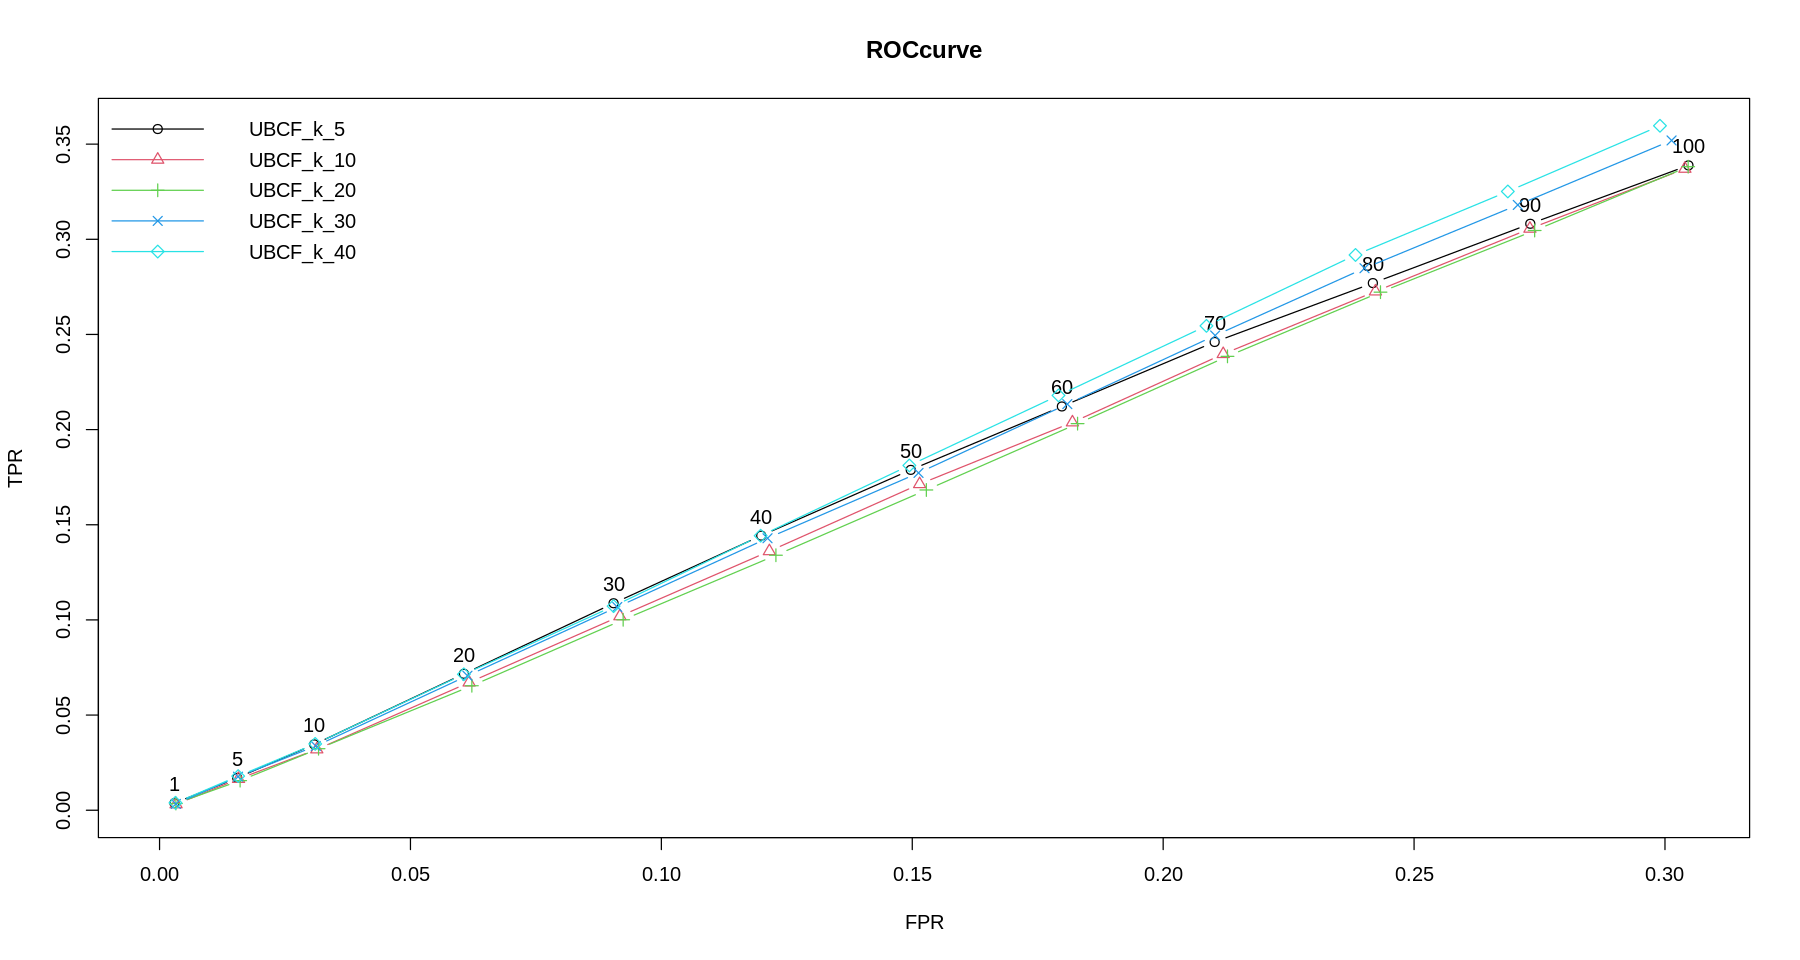

In [ ]:
## INSERT YOUR CODE HERE
plot(list_results, annotate = 1, legend = "topleft") 
title("ROCcurve")


# Bonus track

Please use a different algorithm and compare its perfomance againts those studied in this lab. Make the neccesary assumptions.

**Answer:**

We've chosen to use Jaccard similarity to compare the difference to the last exercise done in Cosine similarity. 

We see that for the k 40, when False Positive Rate is around 0.3, the Jaccard one has a higher True Positive Rate comparing to Cosine one (0.40 vs 0.35), ceteris paribus. We may infer that Jaccard similarity may perform if we're aiming for True Positive Rate, but the difference are not substantial.


UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.254sec] 
	 2  [0.004sec/0.476sec] 
	 3  [0.004sec/0.241sec] 
	 4  [0.013sec/0.229sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.004sec/0.254sec] 
	 2  [0.005sec/0.466sec] 
	 3  [0.004sec/0.257sec] 
	 4  [0.004sec/0.252sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.267sec] 
	 2  [0.005sec/0.272sec] 
	 3  [0.004sec/0.304sec] 
	 4  [0.004sec/0.272sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.289sec] 
	 2  [0.004sec/0.284sec] 
	 3  [0.005sec/0.512sec] 
	 4  [0.005sec/0.279sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.005sec/0.292sec] 
	 2  [0.004sec/0.286sec] 
	 3  [0.004sec/0.302sec] 
	 4  [0.004sec/0.288sec] 


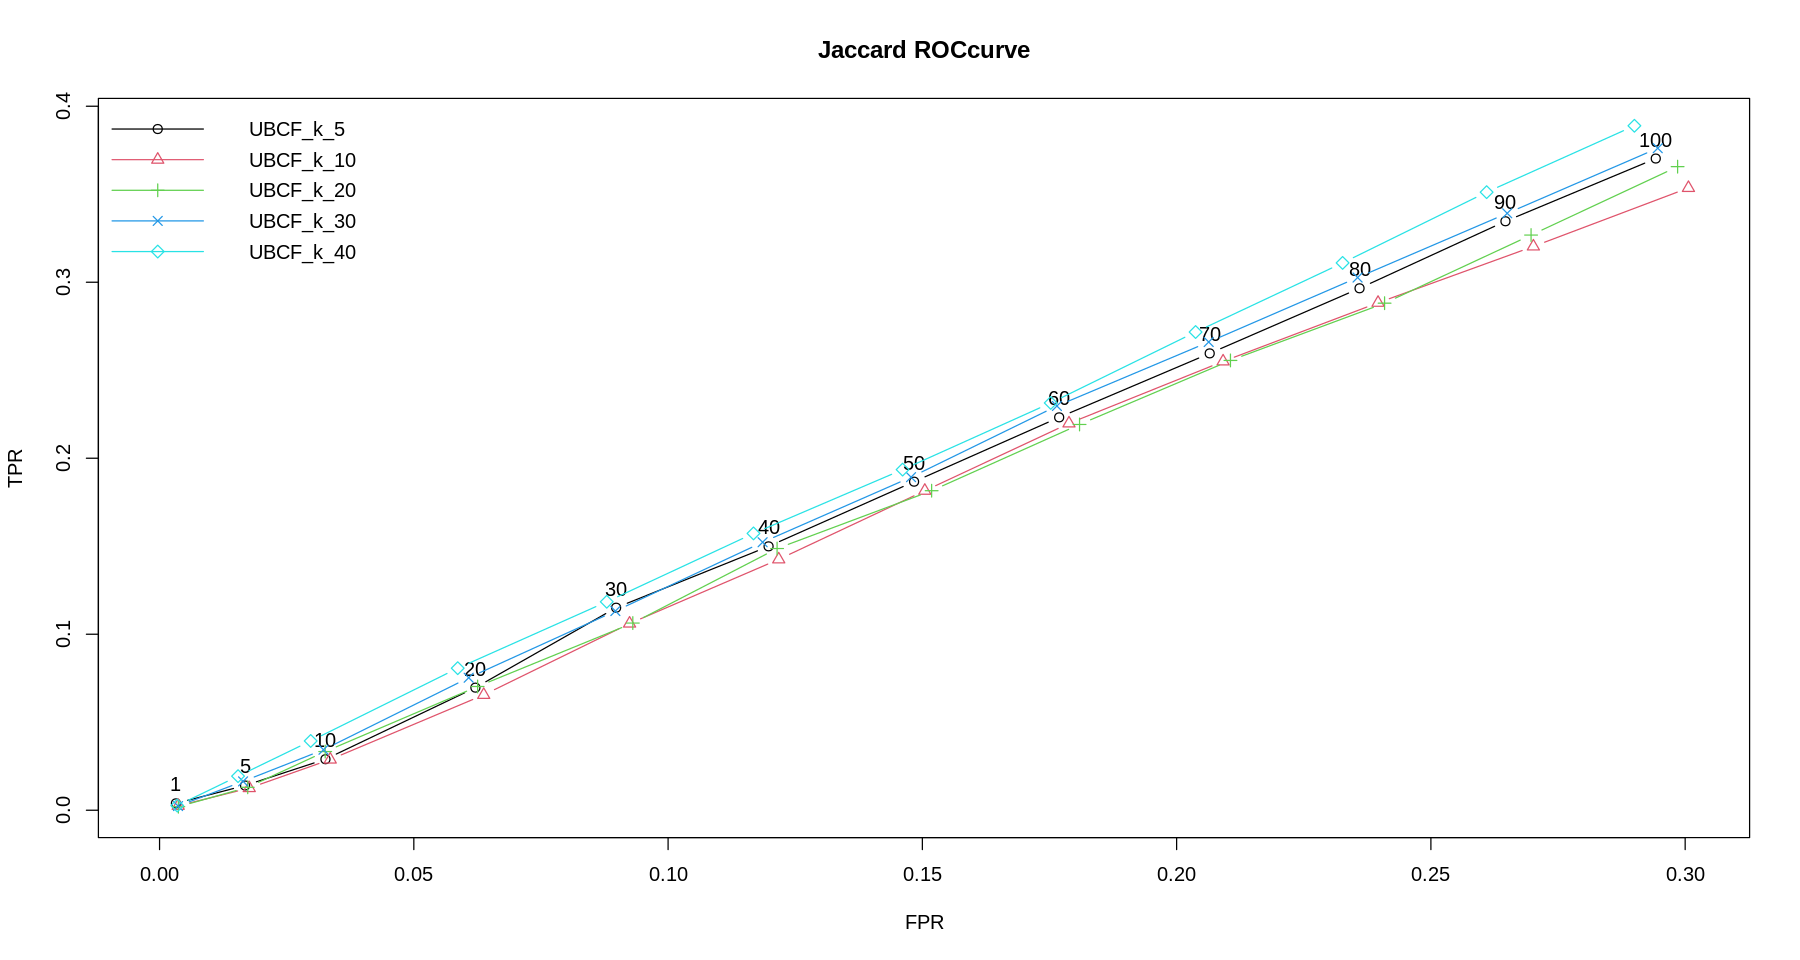

In [67]:
models_to_evaluate <- list(
UBCF_cos = list(name = "UBCF", param = list(method ="cosine"))
)

vector_k <- c(5, 10, 20, 30, 40)
models_to_evaluate <- lapply(vector_k, function(k){
list(name = "UBCF", param = list(method = "jaccard", nn = k))})
names(models_to_evaluate) <- paste0("UBCF_k_", vector_k)

n_recommendations <- c(1, 5, seq(10, 100, 10))
list_results <- evaluate(x = eval_sets, method = models_to_evaluate, n= n_recommendations)

plot(list_results, annotate = 1, legend = "topleft") 
title("Jaccard ROCcurve")